In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import f_classif
import numpy as np
import hvplot.pandas


pd.set_option('display.max_columns', None)

### Import Data


In [27]:
filename = 'loan_data.csv'
df = pd.read_csv(filename)

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_29708\2570835424.py:2: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [28]:
print(df.shape)

df.head()

(759338, 72)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0  112435993        NaN       2300         2300           2300.0  36 months   
1  112290210        NaN      16000        16000          16000.0  60 months   
2  112436985        NaN       6025         6025           6025.0  36 months   
3  112439006        NaN      20400        20400          20400.0  36 months   
4  112438929        NaN      13000        13000          13000.0  36 months   

   int_rate  installment grade sub_grade     emp_title emp_length  \
0     12.62        77.08     C        C1           NaN        NaN   
1     12.62       360.95     C        C1       teacher  10+ years   
2     15.05       209.01     C        C4  Front Office    7 years   
3      9.44       652.91     B        B1       Manager  10+ years   
4     11.99       431.73     B        B5     Paramedic  10+ years   

  home_ownership  annual_inc verification_status   issue_d loan_status  \
0            OWN     10000.0        Not Verified  Jun-2017     Current   
1       MORTGAGE     94000.0        Not Verified  Jun-2017     Current   
2       MORTGAGE     46350.0        Not Verified  Jun-2017     Current   
3           RENT     44000.0     Source Verified  Jun-2017     Current   
4       MORTGAGE     85000.0     Source Verified  Jun-2017     Current   

  pymnt_plan desc             purpose                    title zip_code  \
0          n  NaN         credit_card  Credit card refinancing    148xx   
1          n  NaN  debt_consolidation       Debt consolidation    021xx   
2          n  NaN    home_improvement         Home improvement    018xx   
3          n  NaN                 car            Car financing    913xx   
4          n  NaN  debt_consolidation       Debt consolidation    560xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0         NY  21.61            0         Sep-1985             1.0   
1         MA  25.61            0         Jun-1992             0.0   
2         MA   8.88            0         Jun-2002             0.0   
3         CA  27.06            0         Jan-2007             1.0   
4         MN   6.79            1         Feb-2002             0.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN         4        0   
1                     NaN                     NaN         9        0   
2                     NaN                     NaN        11        0   
3                     NaN                     NaN        15        0   
4                    16.0                     NaN         5        0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0     3911.0        55.1          6                   w    2029.91   
1    33752.0       105.8         26                   w   14813.07   
2    12425.0        44.9         27                   w    5340.82   
3     8769.0        18.7         19                   w   17898.81   
4     6866.0        88.0         24                   w   11460.66   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        2029.91       382.99           382.99           270.09   
1       14813.07      2060.09          2060.09          1186.93   
2        5340.82      1032.46          1032.46           684.18   
3       17898.81      3237.80          3237.80          2501.19   
4       11460.66      2137.00          2137.00          1539.34   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         112.90                 0.0         0.0                      0.0   
1         873.16                 0.0         0.0                      0.0   
2         348.28                 0.0         0.0                      0.0   
3         736.61                 0.0         0.0                      0.0   
4         597.66                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0     Dec-2017        

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

In [30]:
# selected_columns = [
#     'annual_inc', 'dti', 'revol_util', 'emp_length', 'home_ownership',
#     'purpose', 'loan_amnt', 'int_rate', 'installment', 'grade',
#     'sub_grade', 'verification_status', 'delinq_2yrs', 'inq_last_6mths',
#     'open_acc', 'pub_rec', 'total_acc', 'addr_state',
#     'term', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
#     'total_rec_late_fee', 'collections_12_mths_ex_med', 'loan_status' 
# ]

# selected_df = df[selected_columns]
# print(selected_df.shape)
# selected_df.head()

### Target Output - Loan Status

In [31]:
selected_df = df;

selected_df['loan_status'].value_counts()

loan_status
Current               565523
Fully Paid            130718
Charged Off            37197
Late (31-120 days)     15354
In Grace Period         6634
Late (16-30 days)       3876
Default                   36
Name: count, dtype: int64

In [32]:
selected_df= selected_df[selected_df['loan_status'] != 'In Grace Period']    # Remove loans in Grace Period

selected_df['loan_status'] = selected_df['loan_status'].str.replace(pat='Default', regex=True, repl='Charged Off') 

selected_df['loan_status'].value_counts() 

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_29708\3659155914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['loan_status'] = selected_df['loan_status'].str.replace(pat='Default', regex=True, repl='Charged Off')


loan_status
Current               565523
Fully Paid            130718
Charged Off            37233
Late (31-120 days)     15354
Late (16-30 days)       3876
Name: count, dtype: int64

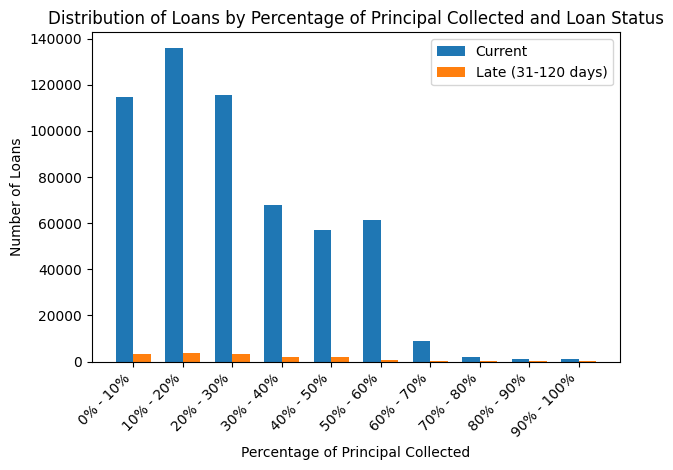

In [33]:
current_loans = selected_df[selected_df['loan_status'] == 'Current']
late_loans = selected_df[selected_df['loan_status'] == 'Late (31-120 days)']

# Combine both datasets into one DataFrame
combined_loans = pd.concat([current_loans, late_loans])

# Calculate the percentage of principal collected for each loan
combined_loans['principal_collected_percentage'] = (combined_loans['total_rec_prncp'] / combined_loans['loan_amnt']) * 100

# Define the percentage ranges
percentage_ranges = [(i, i+10) for i in range(0, 100, 10)]

# Initialize dictionaries to count the number of loans in each percentage range
current_loan_counts = {range_: 0 for range_ in percentage_ranges}
late_loan_counts = {range_: 0 for range_ in percentage_ranges}

# Count the number of loans in each percentage range for both loan statuses
for percentage, loan_status in zip(combined_loans['principal_collected_percentage'], combined_loans['loan_status']):
    for range_ in percentage_ranges:
        if range_[0] <= percentage < range_[1]:
            if loan_status == 'Current':
                current_loan_counts[range_] += 1
            elif loan_status == 'Late (31-120 days)':
                late_loan_counts[range_] += 1
            break  # Once the loan is counted in a range, move to the next loan

# Extract the range labels for plotting
labels = [f"{range_[0]}% - {range_[1]}%" for range_ in percentage_ranges]

# Extract the counts for plotting
current_counts = [current_loan_counts[range_] for range_ in percentage_ranges]
late_counts = [late_loan_counts[range_] for range_ in percentage_ranges]

# Plot the bar chart
bar_width = 0.35
x = np.arange(len(labels))
plt.bar(x - bar_width/2, current_counts, width=bar_width, label='Current')
plt.bar(x + bar_width/2, late_counts, width=bar_width, label='Late (31-120 days)')
plt.xlabel('Percentage of Principal Collected')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loans by Percentage of Principal Collected and Loan Status')
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [34]:
# Calculate the percentage of principal collected for each loan
selected_df['principal_collected_percentage'] = (selected_df['total_rec_prncp'] / selected_df['loan_amnt']) * 100

# Update the loan status based on the percentage of principal collected
selected_df.loc[(selected_df['loan_status'] == 'Current') & (selected_df['principal_collected_percentage'] > 60), 'loan_status'] = 'Fully Paid'
selected_df.loc[(selected_df['loan_status'] == 'Late (31-120 days)') & (selected_df['principal_collected_percentage'] < 30), 'loan_status'] = 'Charged Off'

selected_df['loan_status'].value_counts() 

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_29708\1289155352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['principal_collected_percentage'] = (selected_df['total_rec_prncp'] / selected_df['loan_amnt']) * 100


loan_status
Current               552507
Fully Paid            143734
Charged Off            47781
Late (31-120 days)      4806
Late (16-30 days)       3876
Name: count, dtype: int64

In [35]:
df_modified = selected_df[~selected_df['loan_status'].isin(['Late (16-30 days)', 'Late (31-120 days)', 'Current'])]
print(df_modified.shape)
df_modified['loan_status'].value_counts() 

(191515, 73)


loan_status
Fully Paid     143734
Charged Off     47781
Name: count, dtype: int64

In [36]:
df_modified = df_modified.drop(columns=['principal_collected_percentage'])
df_modified.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
8   112038251        NaN      11575        11575          11575.0  36 months   
10  112149045        NaN       7200         7200           7200.0  36 months   
24  112052261        NaN       7500         7500           7500.0  36 months   
42  111999259        NaN      10000        10000          10000.0  60 months   
91  111808508        NaN      14000        14000          14000.0  36 months   

    int_rate  installment grade sub_grade            emp_title emp_length  \
8       7.35       359.26     A        A4  Solutions Architect    6 years   
10     24.85       285.70     E        E3                  Pse    2 years   
24      7.35       232.79     A        A4   Associate Director    7 years   
42     16.02       243.29     C        C5               Biller    7 years   
91     16.02       492.34     C        C5           cdl driver    7 years   

   home_ownership  annual_inc verification_status   issue_d loan_status  \
8             OWN    153000.0        Not Verified  Jun-2017  Fully Paid   
10           RENT     50000.0     Source Verified  Jun-2017  Fully Paid   
24       MORTGAGE    110000.0        Not Verified  Jun-2017  Fully Paid   
42           RENT     51979.0     Source Verified  Jun-2017  Fully Paid   
91       MORTGAGE     75000.0            Verified  Jun-2017  Fully Paid   

   pymnt_plan desc             purpose                    title zip_code  \
8           n  NaN         credit_card  Credit card refinancing    923xx   
10          n  NaN  debt_consolidation       Debt consolidation    985xx   
24          n  NaN  debt_consolidation       Debt consolidation    750xx   
42          n  NaN  debt_consolidation       Debt consolidation    958xx   
91          n  NaN  debt_consolidation       Debt consolidation    026xx   

   addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
8          CA  16.99            0         Jul-1994             0.0   
10         WA   6.07            0         Jan-2000             0.0   
24         TX  13.12            0         Mar-2013             2.0   
42         CA  10.11            0         Aug-2006             0.0   
91         MA  10.86            1         May-2008             0.0   

    mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
8                     24.0                    84.0        20        1   
10                    72.0                     NaN         4        0   
24                     NaN                     NaN        19        0   
42                     NaN                    55.0        15        2   
91                    17.0                     NaN         4        0   

    revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
8      8550.0        22.7         46                   w        0.0   
10     3560.0        98.9          5                   w        0.0   
24    23348.0        27.2         27                   w        0.0   
42     5733.0        20.0         21                   w        0.0   
91     2700.0        90.0         10                   w        0.0   

    out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
8             0.0  11707.816236         11707.82          11575.0   
10            0.0   7206.461000          7206.46           7200.0   
24            0.0   7642.289180          7642.29           7500.0   
42            0.0  10026.700000         10026.70          10000.0   
91            0.0  14375.136851         14375.14          14000.0   

    total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
8          132.82                 0.0         0.0                      0.0   
10           6.46                 0.0         0.0                      0.0   
24         142.29                 0.0         0.0                      0.0   
42          26.70                 0.0         0.0                      0.0   
91         375.14                 0.0         0.0                  

### Select the features

In [37]:
df_numerical_features = df_modified.select_dtypes(include=['int', 'float'])
df_numerical_features.describe()

id  member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count  1.915150e+05        0.0  191515.000000  191515.000000    191515.000000   
mean   8.486023e+07        NaN   14604.011174   14604.011174     14598.267188   
std    1.286874e+07        NaN    9114.805202    9114.805202      9111.965324   
min    6.510400e+04        NaN    1000.000000    1000.000000       775.000000   
25%    7.449201e+07        NaN    7500.000000    7500.000000      7500.000000   
50%    8.391064e+07        NaN   12000.000000   12000.000000     12000.000000   
75%    9.361337e+07        NaN   20000.000000   20000.000000     20000.000000   
max    1.201180e+08        NaN   40000.000000   40000.000000     40000.000000   

            int_rate    installment    annual_inc            dti  \
count  191515.000000  191515.000000  1.915150e+05  191475.000000   
mean       13.787241     450.622469  7.984813e+04      18.566909   
std         5.470286     282.461283  7.632500e+04      11.188874   
min         5.320000      30.120000  0.000000e+00      -1.000000   
25%         9.750000     242.570000  4.900000e+04      11.900000   
50%        12.880000     377.770000  6.800000e+04      17.890000   
75%        16.990000     607.820000  9.500000e+04      24.600000   
max        30.990000    1714.540000  9.550000e+06     999.000000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  191515.00000   191514.000000           100142.000000   
mean        0.34201        0.635572               34.314144   
std         0.92968        0.918926               22.091573   
min         0.00000        0.000000                0.000000   
25%         0.00000        0.000000               16.000000   
50%         0.00000        0.000000               31.000000   
75%         0.00000        1.000000               50.000000   
max        21.00000        5.000000              192.000000   

       mths_since_last_record       open_acc        pub_rec     revol_bal  \
count            38842.000000  191515.000000  191515.000000  1.915150e+05   
mean                68.855826      11.931541       0.261656  1.612410e+04   
std                 24.363911       5.749732       0.653623  2.362275e+04   
min                  0.000000       1.000000       0.000000  0.000000e+00   
25%                 54.000000       8.000000       0.000000  5.519500e+03   
50%                 71.000000      11.000000       0.000000  1.058800e+04   
75%                 86.000000      15.000000       0.000000  1.915350e+04   
max                120.000000      86.000000      46.000000  1.039013e+06   

          revol_util      total_acc      out_prncp  out_prncp_inv  \
count  191381.000000  191515.000000  191515.000000  191515.000000   
mean       47.740032      25.423622    1064.939210    1064.585865   
std        24.735198      12.319893    3948.994186    3947.535300   
min         0.000000       2.000000       0.000000       0.000000   
25%        28.800000      17.000000       0.000000       0.000000   
50%        47.000000      24.000000       0.000000       0.000000   
75%        66.300000      32.000000       0.000000       0.000000   
max       172.000000     176.000000   40000.000000   40000.000000   

         total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
count  191515.000000    191515.000000    191515.000000  191515.000000   
mean    12434.565498     12429.780432     10931.569203    1351.423787   
std      9837.982116      9834.976957      9298.013275    1460.226132   
min         0.000000         0.000000         0.000000       0.000000   
25%      4961.010000      4957.680000      3350.000000     376.310000   
50%      9935.580000      9927.240000      8400.000000     878.360000   
75%     17380.961238     17376.975000     16000.000000    1808.815000   
max     52779.784886     52779.780000     40000.000000   15112.400000   

       total_rec_late_fee     recoveries  collection_recovery_fee  \
count       191515.000000  191515.000000            191515.0000

In [38]:
df_modified = df_modified.drop(columns = ['member_id', 'policy_code'])

#### Features with missing values

In [39]:
total = df_modified.isnull().sum()
percent = (df_modified.isnull().sum() / len(df_modified)) * 100

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_with_nulls = missing_data[missing_data['Total'] > 0].sort_values(by='Total', ascending=False)

print(missing_data_with_nulls)

                              Total    Percent
desc                         191508  99.996345
dti_joint                    187288  97.792862
verification_status_joint    187288  97.792862
annual_inc_joint             187288  97.792862
next_pymnt_d                 167915  87.677205
mths_since_last_record       152673  79.718560
mths_since_last_major_derog  135884  70.952145
mths_since_last_delinq        91373  47.710623
il_util                       24661  12.876798
emp_title                     12347   6.447015
emp_length                    12238   6.390100
title                          8918   4.656554
mths_since_rcnt_il             4533   2.366916
last_pymnt_d                    948   0.495000
revol_util                      134   0.069968
all_util                         56   0.029241
open_acc_6m                      43   0.022453
total_cu_tl                      43   0.022453
inq_last_12m                     43   0.022453
open_il_12m                      42   0.021930
open_il_24m  

Drop features with more than 47% of missing values

In [40]:
columns_to_drop = missing_data[missing_data['Percent'] > 47].index

df_modified = df_modified.drop(columns=columns_to_drop)

print(f"Columns dropped: {list(columns_to_drop)}")
df_modified.head()

Columns dropped: ['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint']


id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
8   112038251      11575        11575          11575.0  36 months      7.35   
10  112149045       7200         7200           7200.0  36 months     24.85   
24  112052261       7500         7500           7500.0  36 months      7.35   
42  111999259      10000        10000          10000.0  60 months     16.02   
91  111808508      14000        14000          14000.0  36 months     16.02   

    installment grade sub_grade            emp_title emp_length  \
8        359.26     A        A4  Solutions Architect    6 years   
10       285.70     E        E3                  Pse    2 years   
24       232.79     A        A4   Associate Director    7 years   
42       243.29     C        C5               Biller    7 years   
91       492.34     C        C5           cdl driver    7 years   

   home_ownership  annual_inc verification_status   issue_d loan_status  \
8             OWN    153000.0        Not Verified  Jun-2017  Fully Paid   
10           RENT     50000.0     Source Verified  Jun-2017  Fully Paid   
24       MORTGAGE    110000.0        Not Verified  Jun-2017  Fully Paid   
42           RENT     51979.0     Source Verified  Jun-2017  Fully Paid   
91       MORTGAGE     75000.0            Verified  Jun-2017  Fully Paid   

   pymnt_plan             purpose                    title zip_code  \
8           n         credit_card  Credit card refinancing    923xx   
10          n  debt_consolidation       Debt consolidation    985xx   
24          n  debt_consolidation       Debt consolidation    750xx   
42          n  debt_consolidation       Debt consolidation    958xx   
91          n  debt_consolidation       Debt consolidation    026xx   

   addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
8          CA  16.99            0         Jul-1994             0.0        20   
10         WA   6.07            0         Jan-2000             0.0         4   
24         TX  13.12            0         Mar-2013             2.0        19   
42         CA  10.11            0         Aug-2006             0.0        15   
91         MA  10.86            1         May-2008             0.0         4   

    pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
8         1     8550.0        22.7         46                   w        0.0   
10        0     3560.0        98.9          5                   w        0.0   
24        0    23348.0        27.2         27                   w        0.0   
42        2     5733.0        20.0         21                   w        0.0   
91        0     2700.0        90.0         10                   w        0.0   

    out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
8             0.0  11707.816236         11707.82          11575.0   
10            0.0   7206.461000          7206.46           7200.0   
24            0.0   7642.289180          7642.29           7500.0   
42            0.0  10026.700000         10026.70          10000.0   
91            0.0  14375.136851         14375.14          14000.0   

    total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
8          132.82                 0.0         0.0                      0.0   
10           6.46                 0.0         0.0                      0.0   
24         142.29                 0.0         0.0                      0.0   
42          26.70                 0.0         0.0                      0.0   
91         375.14                 0.0         0.0                      0.0   

   last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
8      Sep-2017         11360.38           Sep-2017   
10     Jul-2017          7231.31           Sep-2017   
24     Oct-2017          7184.37           Oct-2017   
42     Jul-2017         10048.95           Oct-2017   
91     Sep-2017         13913.95           Sep-2017   

    collections_12_mths_ex_med application_type  acc_now_delinq  tot_coll_amt 

##### il_util (installment utilization. It represents the ratio of the borrower's current installment account balances to the original loan amounts)

In [41]:
df_modified['il_util'].describe()

count    166854.000000
mean         72.599159
std          22.363027
min           0.000000
25%          60.000000
50%          76.000000
75%          88.000000
max         558.000000
Name: il_util, dtype: float64

<Axes: xlabel='il_util', ylabel='Count'>

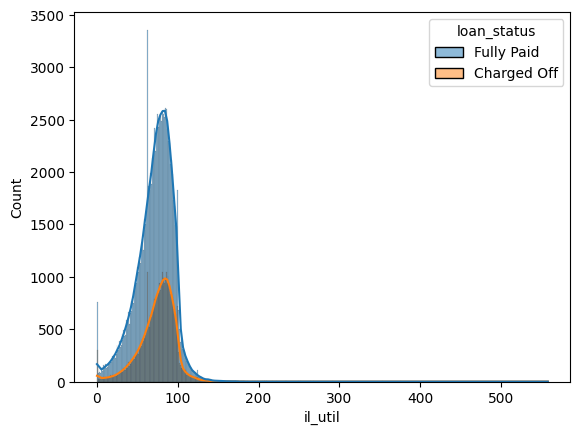

In [42]:
sns.histplot(data=df_modified, x='il_util', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='il_util'>

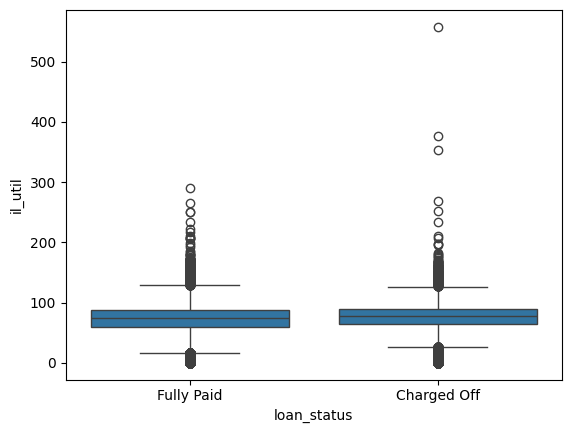

In [43]:
sns.boxplot(x='loan_status', y='il_util', data=df_modified)

Shape of the DataFrame where il_util is less than 150: (162340, 62)


<Axes: xlabel='il_util', ylabel='Count'>

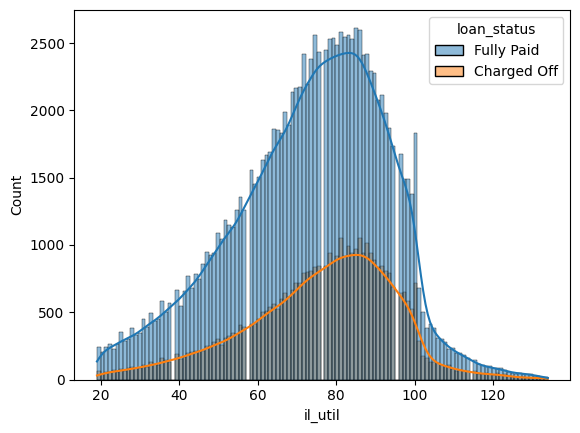

In [44]:
lower_threshold = 18
upper_threshold = 135

filtered_df = df_modified[(df_modified['il_util'] > lower_threshold) & (df_modified['il_util'] < upper_threshold)]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where il_util is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='il_util', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='il_util'>

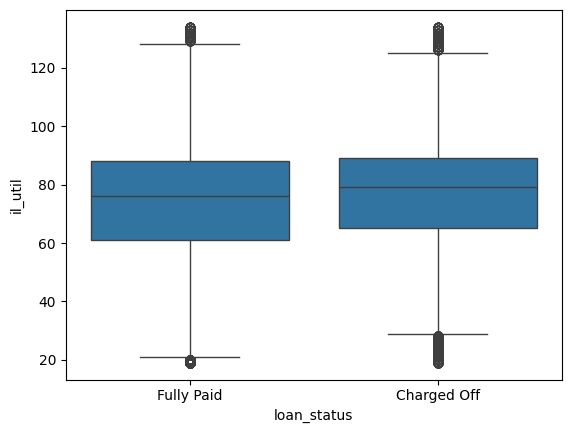

In [45]:
sns.boxplot(x='loan_status', y='il_util', data=filtered_df)

#### mths_since_rcnt_il (How many months it's been since the borrower opened their most recent installment accounts)

In [46]:
df_modified['mths_since_rcnt_il'].describe()

count    186982.000000
mean         18.786006
std          24.244758
min           0.000000
25%           6.000000
50%          11.000000
75%          21.000000
max         415.000000
Name: mths_since_rcnt_il, dtype: float64

<Axes: xlabel='mths_since_rcnt_il', ylabel='Count'>

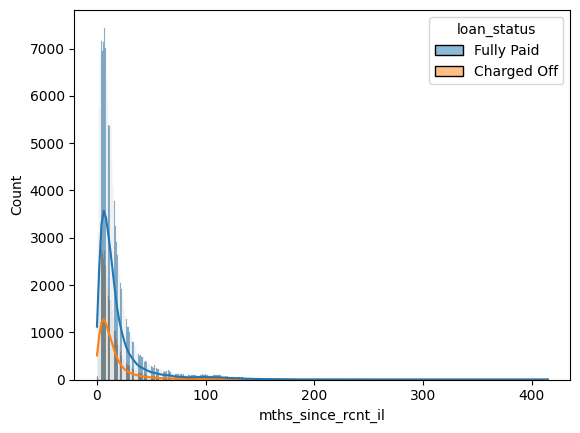

In [47]:
sns.histplot(data=df_modified, x='mths_since_rcnt_il', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='mths_since_rcnt_il'>

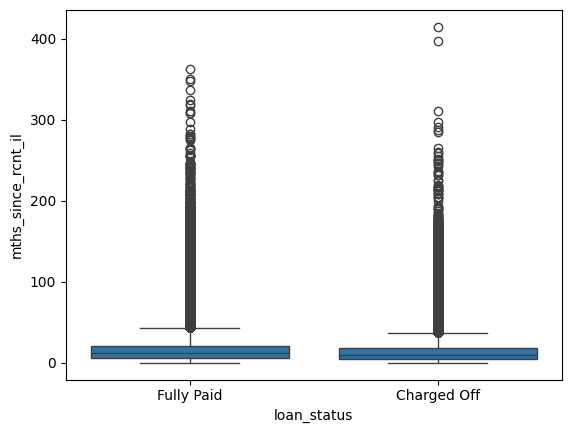

In [48]:
sns.boxplot(x='loan_status', y='mths_since_rcnt_il', data=df_modified)

Shape of the DataFrame where mths_since_rcnt_il is less than 100: (182187, 62)


<Axes: xlabel='mths_since_rcnt_il', ylabel='Count'>

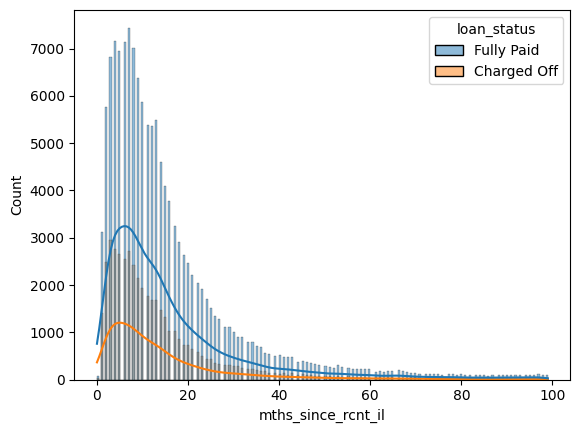

In [49]:
threshold = 100
filtered_df = df_modified[df_modified['mths_since_rcnt_il'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where mths_since_rcnt_il is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='mths_since_rcnt_il', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='mths_since_rcnt_il'>

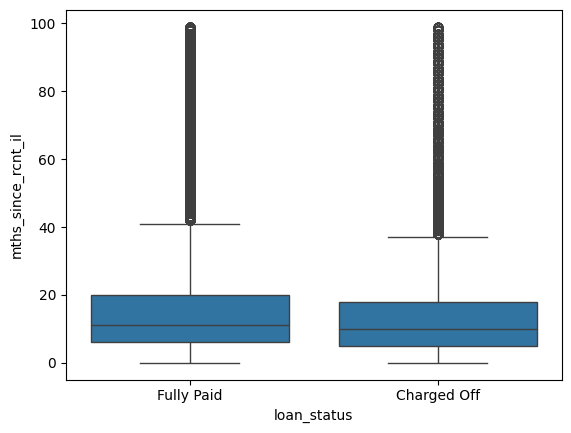

In [40]:
sns.boxplot(x='loan_status', y='mths_since_rcnt_il', data=filtered_df)

In [50]:
filtered_df['mths_since_rcnt_il_log'] = np.log1p(filtered_df['mths_since_rcnt_il'])

C:\Users\SenithDilitha\AppData\Local\Temp\ipykernel_29708\3878091184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['mths_since_rcnt_il_log'] = np.log1p(filtered_df['mths_since_rcnt_il'])


<Axes: xlabel='mths_since_rcnt_il_log', ylabel='Count'>

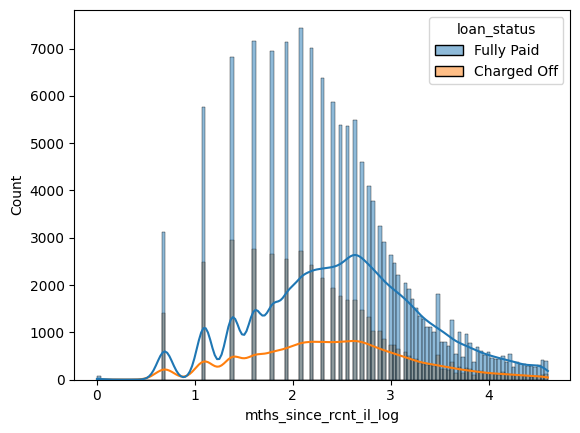

In [51]:
sns.histplot(data=filtered_df, x='mths_since_rcnt_il_log', kde=True, hue='loan_status')

In [13]:
numerical_features = df_modified.select_dtypes(include = ['float64', 'int64']).columns.tolist()

In [16]:
X = df_modified[numerical_features]
y = df_modified['loan_status']

F, p = f_classif(X, y)

anova_df = pd.DataFrame({'Feature': numerical_features, 'F-Statistic': F, 'p-value': p})
anova_df = anova_df.sort_values(by='F-Statistic', ascending=False)

print(anova_df)

top_n_features = anova_df.head(5)['Feature'].tolist()
print("Top N features based on ANOVA F-statistic:", top_n_features)

ValueError: Input X contains NaN.

### Remove empty columns and correlated columns

In [788]:
df_numerical_features = df_modified.select_dtypes(include=['number', 'int', 'float'])
df_numerical_features.head()

annual_inc    dti  revol_util  loan_amnt  int_rate  installment  \
8     153000.0  16.99        22.7      11575      7.35       359.26   
10     50000.0   6.07        98.9       7200     24.85       285.70   
24    110000.0  13.12        27.2       7500      7.35       232.79   
42     51979.0  10.11        20.0      10000     16.02       243.29   
91     75000.0  10.86        90.0      14000     16.02       492.34   

    delinq_2yrs  inq_last_6mths  open_acc  pub_rec  total_acc   total_pymnt  \
8             0             0.0        20        1         46  11707.816236   
10            0             0.0         4        0          5   7206.461000   
24            0             2.0        19        0         27   7642.289180   
42            0             0.0        15        2         21  10026.700000   
91            1             0.0         4        0         10  14375.136851   

    total_rec_prncp  total_rec_int  total_rec_late_fee  \
8           11575.0         132.82                 0.0   
10           7200.0           6.46                 0.0   
24           7500.0         142.29                 0.0   
42          10000.0          26.70                 0.0   
91          14000.0         375.14                 0.0   

    collections_12_mths_ex_med  principal_collected_percentage  
8                            0                           100.0  
10                           0                           100.0  
24                           0                           100.0  
42                           0                           100.0  
91                           0                           100.0

#### Numerical features

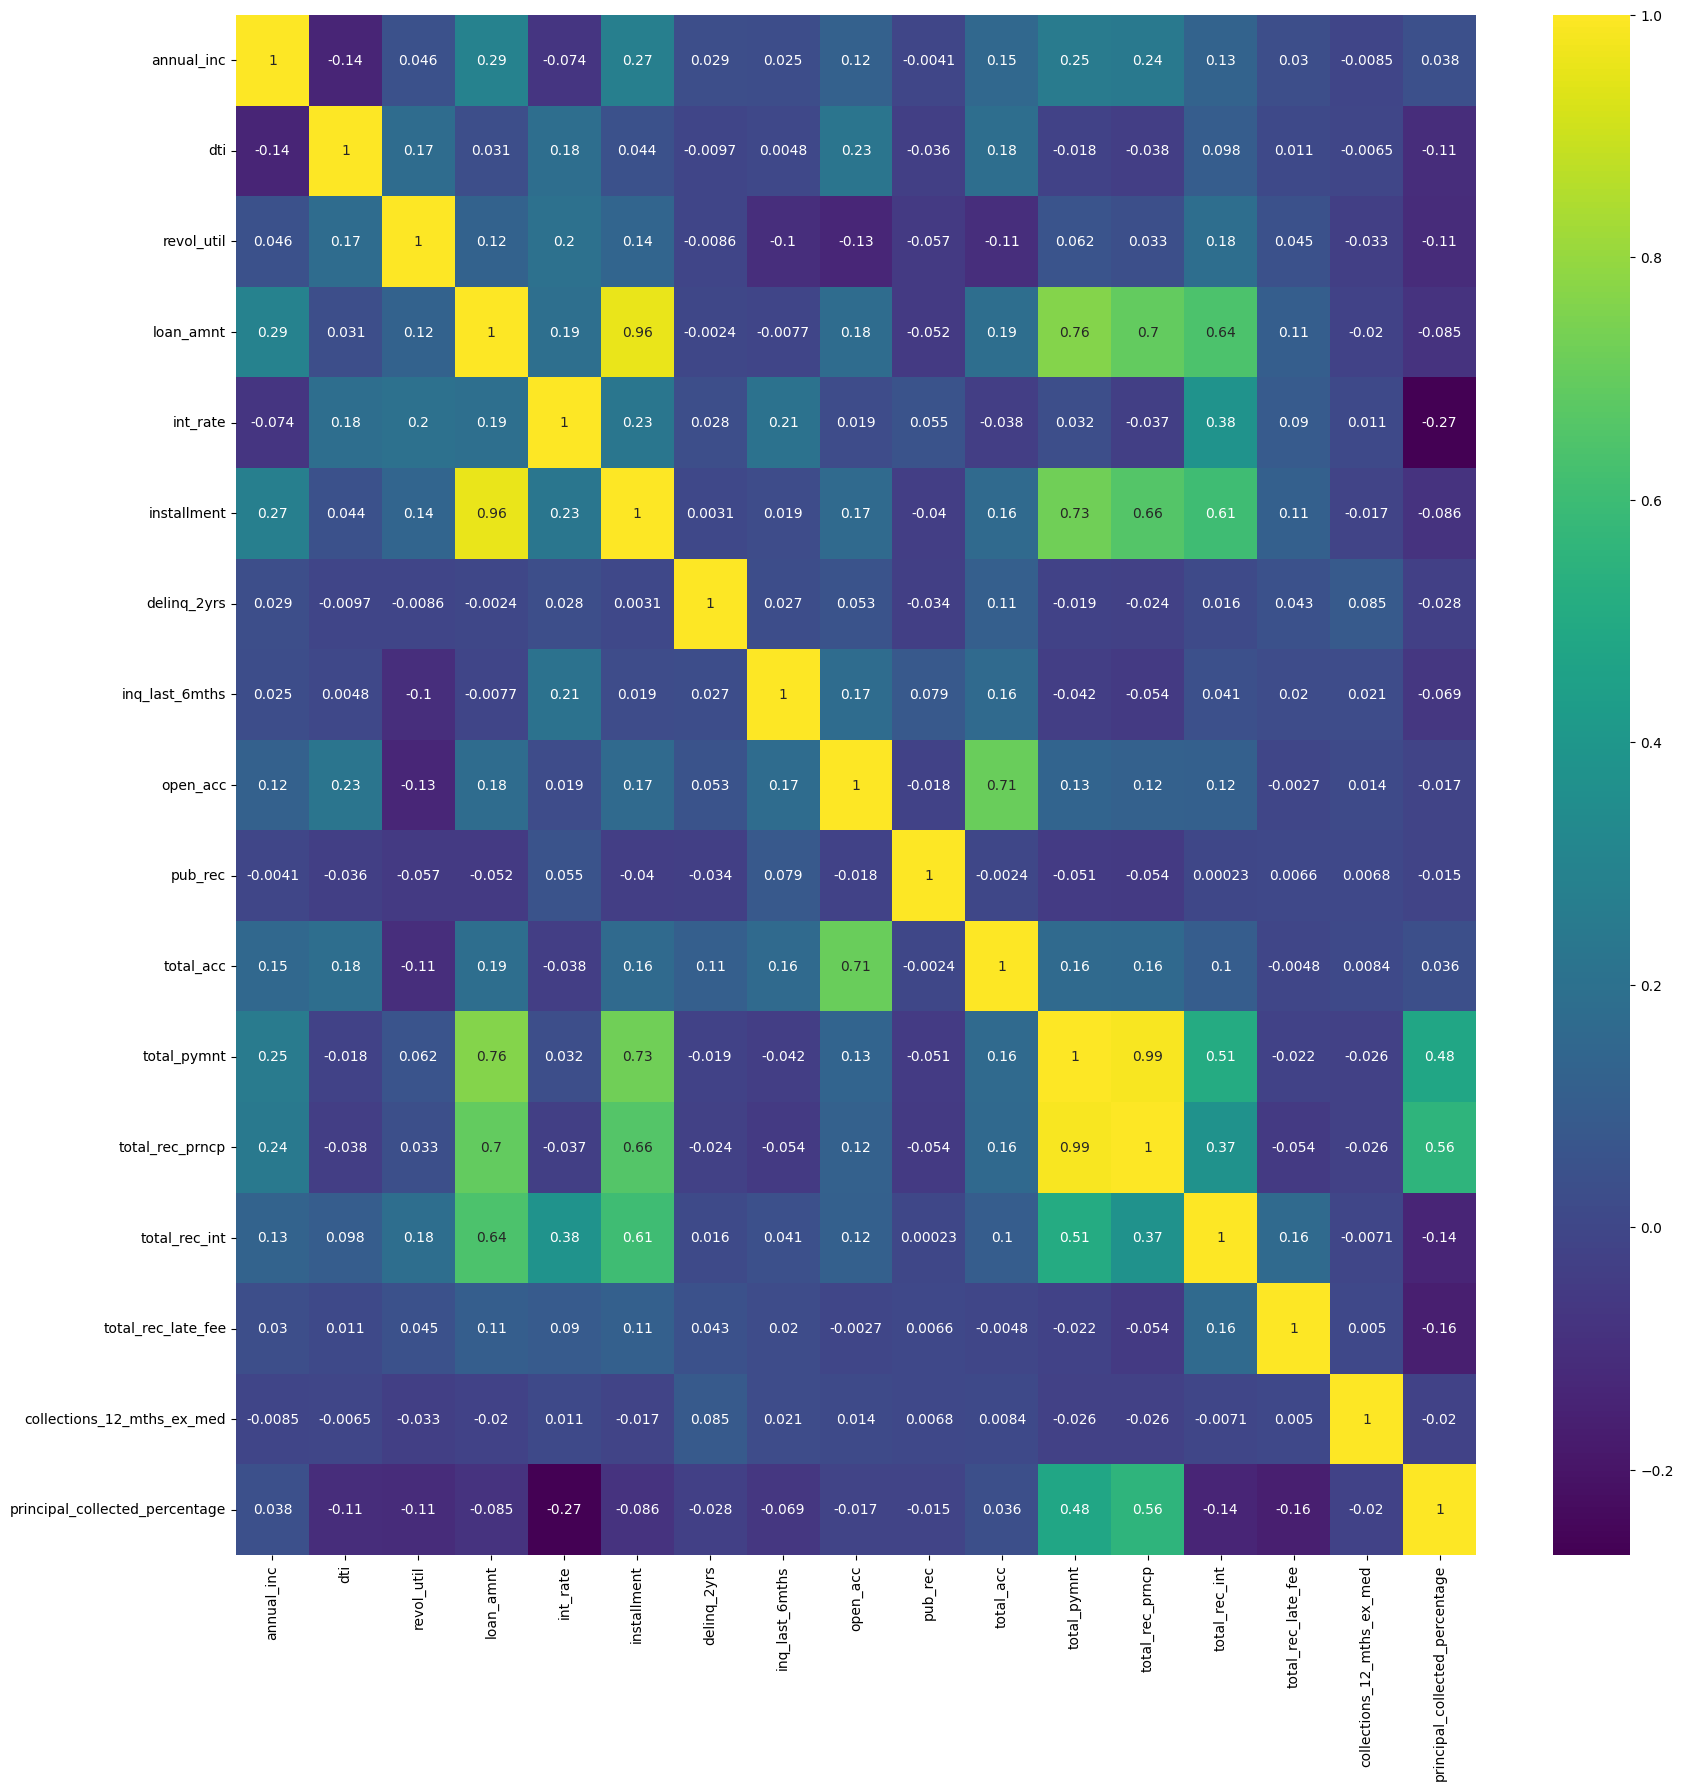

In [789]:
plt.figure(figsize=(20, 20));
sns.heatmap(df_numerical_features.corr(), annot=True, cmap='viridis');

In [790]:
df_modified = df_modified.drop(columns=['total_rec_prncp', 
                           'installment'])

In [791]:
df_modified.head()

annual_inc    dti  revol_util emp_length home_ownership  \
8     153000.0  16.99        22.7    6 years            OWN   
10     50000.0   6.07        98.9    2 years           RENT   
24    110000.0  13.12        27.2    7 years       MORTGAGE   
42     51979.0  10.11        20.0    7 years           RENT   
91     75000.0  10.86        90.0    7 years       MORTGAGE   

               purpose  loan_amnt  int_rate grade sub_grade  \
8          credit_card      11575      7.35     A        A4   
10  debt_consolidation       7200     24.85     E        E3   
24  debt_consolidation       7500      7.35     A        A4   
42  debt_consolidation      10000     16.02     C        C5   
91  debt_consolidation      14000     16.02     C        C5   

   verification_status  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
8         Not Verified            0             0.0        20        1   
10     Source Verified            0             0.0         4        0   
24        Not Verified            0             2.0        19        0   
42     Source Verified            0             0.0        15        2   
91            Verified            1             0.0         4        0   

    total_acc addr_state       term   total_pymnt  total_rec_int  \
8          46         CA  36 months  11707.816236         132.82   
10          5         WA  36 months   7206.461000           6.46   
24         27         TX  36 months   7642.289180         142.29   
42         21         CA  60 months  10026.700000          26.70   
91         10         MA  36 months  14375.136851         375.14   

    total_rec_late_fee  collections_12_mths_ex_med loan_status  \
8                  0.0                           0  Fully Paid   
10                 0.0                           0  Fully Paid   
24                 0.0                           0  Fully Paid   
42                 0.0                           0  Fully Paid   
91                 0.0                           0  Fully Paid   

    principal_collected_percentage  
8                            100.0  
10                           100.0  
24                           100.0  
42                           100.0  
91                           100.0

#### Identifying Missing values

In [792]:
null_columns = df_modified.columns[df_modified.isnull().any()]
df_modified[null_columns].describe(include='all')

dti     revol_util emp_length  inq_last_6mths
count   191475.000000  191381.000000     179277   191514.000000
unique            NaN            NaN         11             NaN
top               NaN            NaN  10+ years             NaN
freq              NaN            NaN      65182             NaN
mean        18.566909      47.740032        NaN        0.635572
std         11.188874      24.735198        NaN        0.918926
min         -1.000000       0.000000        NaN        0.000000
25%         11.900000      28.800000        NaN        0.000000
50%         17.890000      47.000000        NaN        0.000000
75%         24.600000      66.300000        NaN        1.000000
max        999.000000     172.000000        NaN        5.000000

In [793]:
rows_with_null_dti = df_modified[df_modified['revol_util'].isnull()]

# Display the rows where 'dti' is null
rows_with_null_dti[null_columns].head(40)

dti  revol_util emp_length  inq_last_6mths
15313    5.90         NaN    9 years             0.0
30062    7.72         NaN    3 years             0.0
35096    0.00         NaN  10+ years             0.0
49422   28.16         NaN  10+ years             1.0
60865   21.69         NaN    5 years             0.0
64030   10.69         NaN   < 1 year             0.0
85143   11.89         NaN  10+ years             0.0
87712    0.00         NaN  10+ years             0.0
89549    5.62         NaN    5 years             0.0
89678   35.37         NaN   < 1 year             0.0
117143   7.85         NaN   < 1 year             0.0
121535   5.20         NaN  10+ years             0.0
125292  18.08         NaN  10+ years             0.0
154403   5.94         NaN   < 1 year             0.0
162401  26.99         NaN    7 years             1.0
167422  22.81         NaN    2 years             0.0
180208  19.32         NaN    2 years             0.0
193675  23.63         NaN     1 year             0.0
195267   5.04         NaN    4 years             0.0
204960  18.89         NaN  10+ years             0.0
206301  12.07         NaN    8 years             0.0
207108   0.35         NaN    6 years             0.0
208329  18.28         NaN   < 1 year             0.0
210734  12.55         NaN    2 years             0.0
213370   7.73         NaN   < 1 year             0.0
219271  15.08         NaN    4 years             0.0
222282  11.26         NaN    3 years             0.0
222312  34.69         NaN    5 years             0.0
244515  21.64         NaN  10+ years             1.0
248802   8.83         NaN    8 years             0.0
249453  12.96         NaN   < 1 year             0.0
262182  12.02         NaN  10+ years             2.0
265659  19.43         NaN   < 1 year             0.0
265719  22.60         NaN    3 years             0.0
265866  32.42         NaN    5 years             0.0
267482  11.19         NaN  10+ years             0.0
276000  27.28         NaN        NaN             0.0
276734   8.51         NaN  10+ years             0.0
277892   4.10         NaN  10+ years             0.0
286922  18.55         NaN  10+ years             1.0

#### Numerical Variables

In [794]:
df_modified.describe()

annual_inc            dti     revol_util      loan_amnt  \
count  1.915150e+05  191475.000000  191381.000000  191515.000000   
mean   7.984813e+04      18.566909      47.740032   14604.011174   
std    7.632500e+04      11.188874      24.735198    9114.805202   
min    0.000000e+00      -1.000000       0.000000    1000.000000   
25%    4.900000e+04      11.900000      28.800000    7500.000000   
50%    6.800000e+04      17.890000      47.000000   12000.000000   
75%    9.500000e+04      24.600000      66.300000   20000.000000   
max    9.550000e+06     999.000000     172.000000   40000.000000   

            int_rate   delinq_2yrs  inq_last_6mths       open_acc  \
count  191515.000000  191515.00000   191514.000000  191515.000000   
mean       13.787241       0.34201        0.635572      11.931541   
std         5.470286       0.92968        0.918926       5.749732   
min         5.320000       0.00000        0.000000       1.000000   
25%         9.750000       0.00000        0.000000       8.000000   
50%        12.880000       0.00000        0.000000      11.000000   
75%        16.990000       0.00000        1.000000      15.000000   
max        30.990000      21.00000        5.000000      86.000000   

             pub_rec      total_acc    total_pymnt  total_rec_int  \
count  191515.000000  191515.000000  191515.000000  191515.000000   
mean        0.261656      25.423622   12434.565498    1351.423787   
std         0.653623      12.319893    9837.982116    1460.226132   
min         0.000000       2.000000       0.000000       0.000000   
25%         0.000000      17.000000    4961.010000     376.310000   
50%         0.000000      24.000000    9935.580000     878.360000   
75%         0.000000      32.000000   17380.961238    1808.815000   
max        46.000000     176.000000   52779.784886   15112.400000   

       total_rec_late_fee  collections_12_mths_ex_med  \
count       191515.000000               191515.000000   
mean             1.292128                    0.021236   
std              8.331000                    0.164154   
min              0.000000                    0.000000   
25%              0.000000                    0.000000   
50%              0.000000                    0.000000   
75%              0.000000                    0.000000   
max            410.600000                   12.000000   

       principal_collected_percentage  
count                   191515.000000  
mean                        76.797064  
std                         36.723835  
min                          0.000000  
25%                         60.127357  
50%                        100.000000  
75%                        100.000000  
max                        100.000000

##### annual_inc

Shape of the DataFrame where Annual Income is less than 400000: (190837, 24)


<Axes: xlabel='annual_inc', ylabel='Count'>

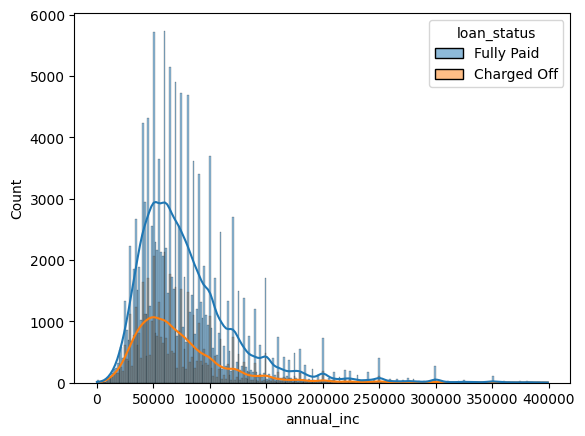

In [795]:
threshold = 400000
filtered_df = df_modified[df_modified['annual_inc'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where Annual Income is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='annual_inc', kde=True, hue='loan_status')

Shape of the DataFrame where Annual Income is less than 170000: (182854, 24)


<Axes: xlabel='annual_inc', ylabel='Count'>

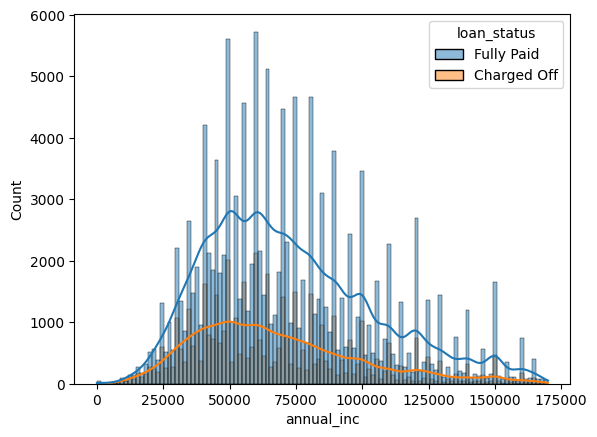

In [796]:
threshold = 170000
filtered_df = df_modified[df_modified['annual_inc'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where Annual Income is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='annual_inc', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='annual_inc'>

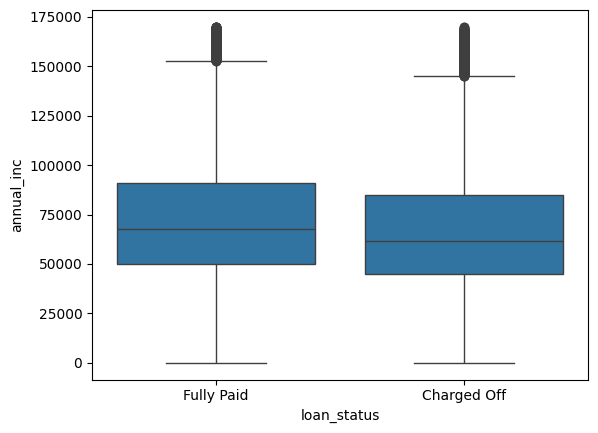

In [797]:
sns.boxplot(x='loan_status', y='annual_inc', data=filtered_df)

##### dti

Shape of the DataFrame where DTI is less than 999: (191470, 24)


<Axes: xlabel='dti', ylabel='Count'>

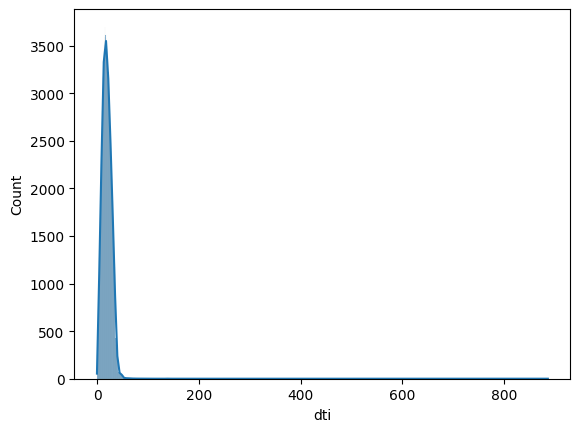

In [798]:
threshold = 999
filtered_df = df_modified[df_modified['dti'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where DTI is less than {threshold}:", filtered_df.shape)

sns.histplot(filtered_df['dti'], kde = True)

Shape of the DataFrame where DTI is less than 47: (190863, 24)


<Axes: xlabel='dti', ylabel='Count'>

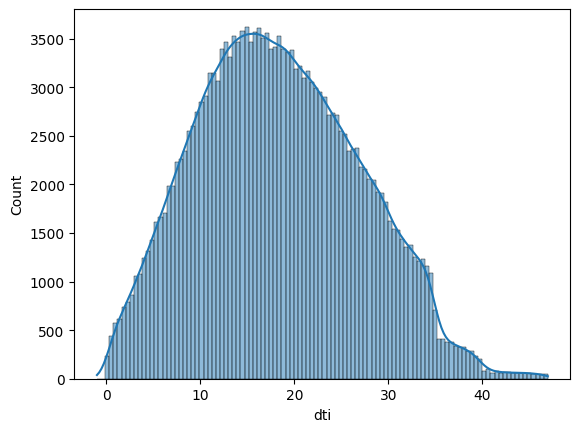

In [799]:
threshold = 47
filtered_df = df_modified[df_modified['dti'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where DTI is less than {threshold}:", filtered_df.shape)

sns.histplot(filtered_df['dti'], kde = True)

<Axes: xlabel='loan_status', ylabel='dti'>

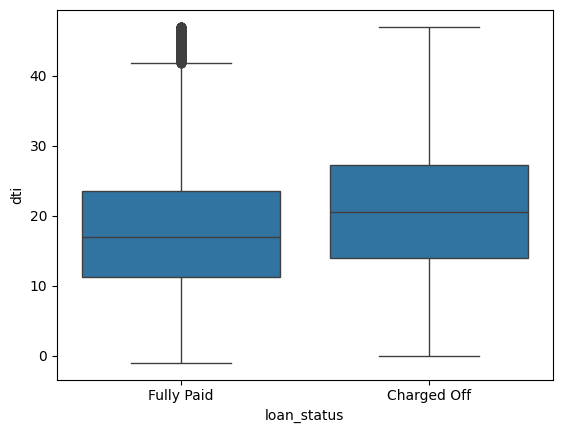

In [800]:
sns.boxplot(x='loan_status', y='dti', data=filtered_df)

In [801]:
df_modified['dti'] = df_modified['dti'].fillna(df_modified['dti'].mean())

##### inq_last_6mths

In [802]:
null_inq_last_6mths_df = df_modified[df_modified['inq_last_6mths'].isnull()]
null_inq_last_6mths_df['loan_status'].value_counts()

loan_status
Fully Paid    1
Name: count, dtype: int64

In [803]:
df_modified.loc[:, 'inq_last_6mths'] = df_modified['inq_last_6mths'].fillna(0)

Shape of the DataFrame where inq_last_6mths is less than 5: (190757, 24)


<Axes: xlabel='inq_last_6mths', ylabel='Count'>

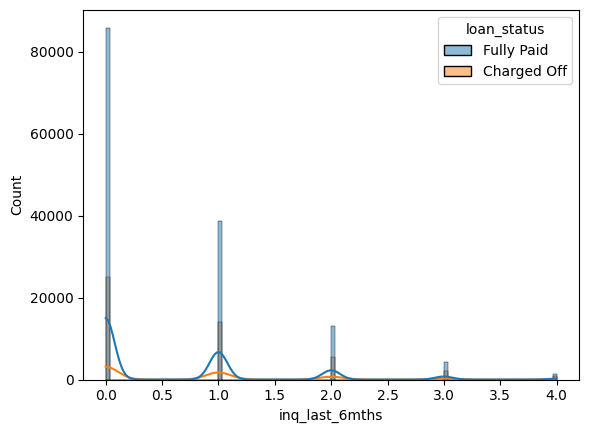

In [804]:
threshold = 5 
filtered_df = df_modified[df_modified['inq_last_6mths'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where inq_last_6mths is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='inq_last_6mths', kde=True, hue='loan_status')

##### revol_util

In [805]:
null_revol_util_df = df_modified[df_modified['revol_util'].isnull()]
print(null_revol_util_df['loan_status'].value_counts())

df_modified['revol_util'] = df_modified['revol_util'].fillna(df_modified['revol_util'].mean())

loan_status
Fully Paid     102
Charged Off     32
Name: count, dtype: int64


<Axes: xlabel='revol_util', ylabel='Count'>

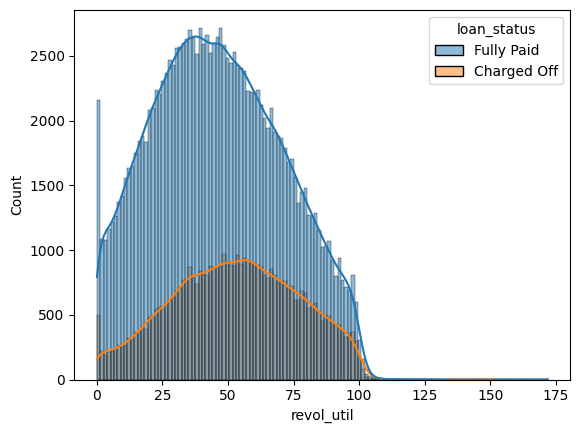

In [806]:
sns.histplot(data=df_modified, x='revol_util', kde=True, hue='loan_status')

Shape of the DataFrame where revol_util is less than 110: (191470, 24)


<Axes: xlabel='revol_util', ylabel='Count'>

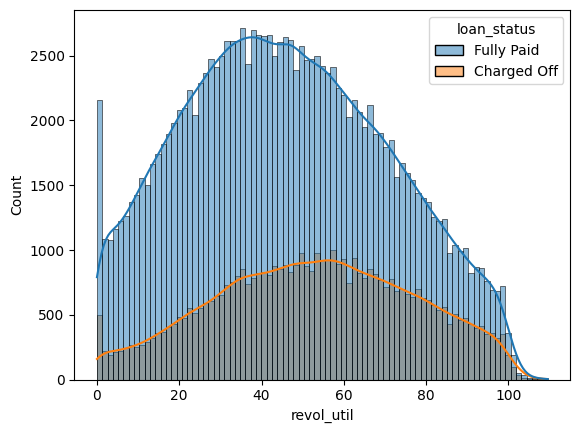

In [807]:
threshold = 110
filtered_df = df_modified[df_modified['revol_util'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where revol_util is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='revol_util', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='revol_util'>

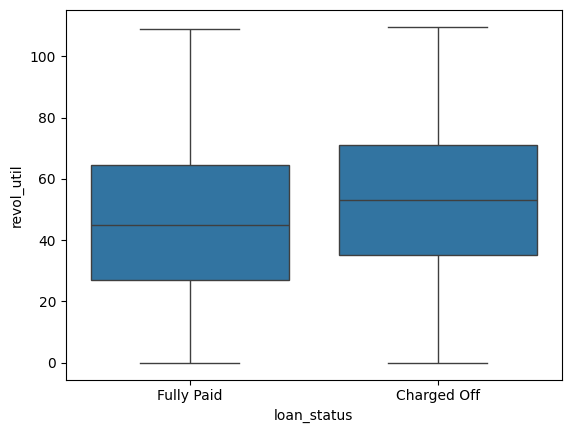

In [808]:
sns.boxplot(x='loan_status', y='revol_util', data=filtered_df)

##### loan_amnt

Shape of the DataFrame where loan_amnt is less than 40000: (190065, 24)


<Axes: xlabel='loan_amnt', ylabel='Count'>

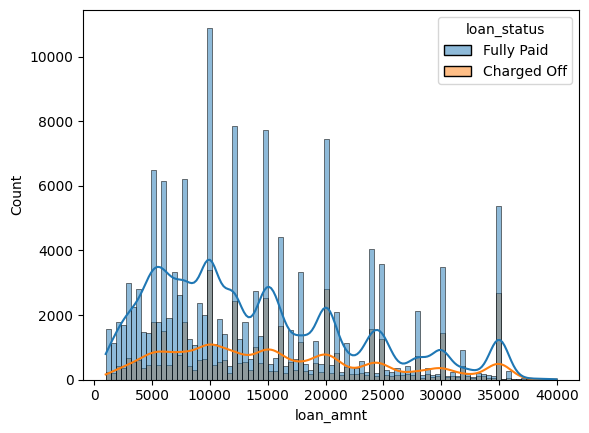

In [809]:
threshold = 40000
filtered_df = df_modified[df_modified['loan_amnt'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where loan_amnt is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='loan_amnt', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

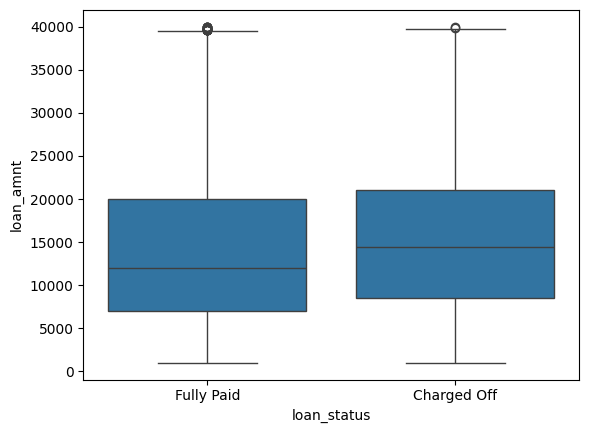

In [810]:
sns.boxplot(x='loan_status', y='loan_amnt', data=filtered_df)

##### int_rate

Shape of the DataFrame where int_rate is less than 31: (191515, 24)


<Axes: xlabel='int_rate', ylabel='Count'>

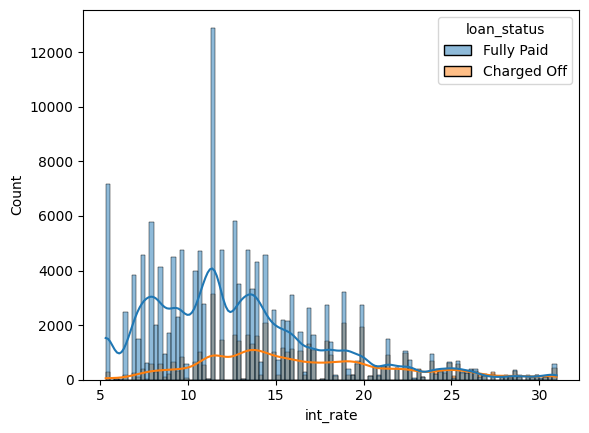

In [811]:
threshold = 31
filtered_df = df_modified[df_modified['int_rate'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where int_rate is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='int_rate', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='int_rate'>

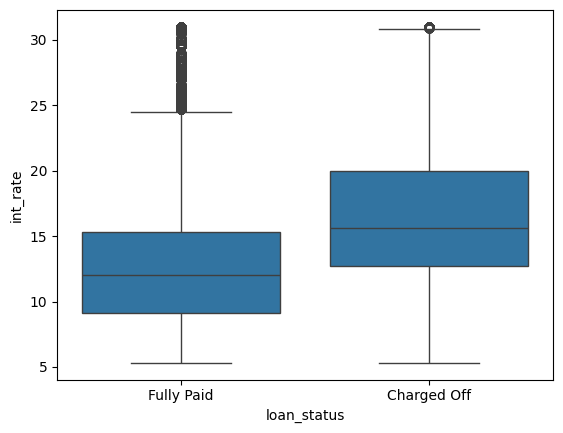

In [812]:
sns.boxplot(x='loan_status', y='int_rate', data=filtered_df)

##### delinq_2yrs

Shape of the DataFrame where delinq_2yrs is less than 5: (189866, 24)


<Axes: xlabel='delinq_2yrs', ylabel='Count'>

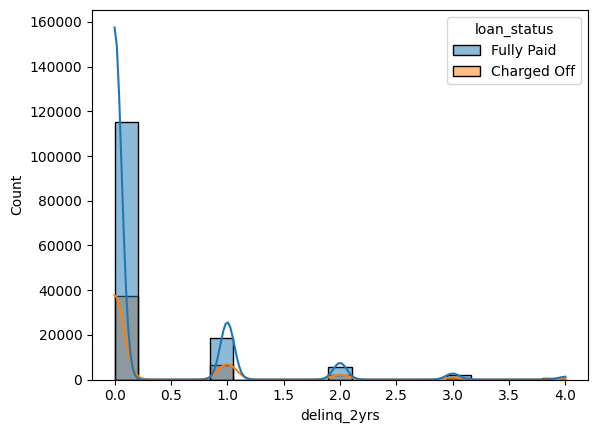

In [813]:
threshold = 5
filtered_df = df_modified[df_modified['delinq_2yrs'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where delinq_2yrs is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='delinq_2yrs', kde=True, hue='loan_status')

##### open_acc

Shape of the DataFrame where open_acc is less than 35: (190693, 24)


<Axes: xlabel='open_acc', ylabel='Count'>

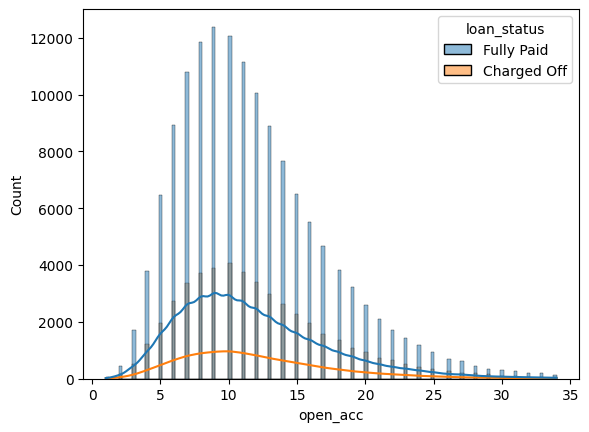

In [814]:
threshold = 35
filtered_df = df_modified[df_modified['open_acc'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where open_acc is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='open_acc', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='open_acc'>

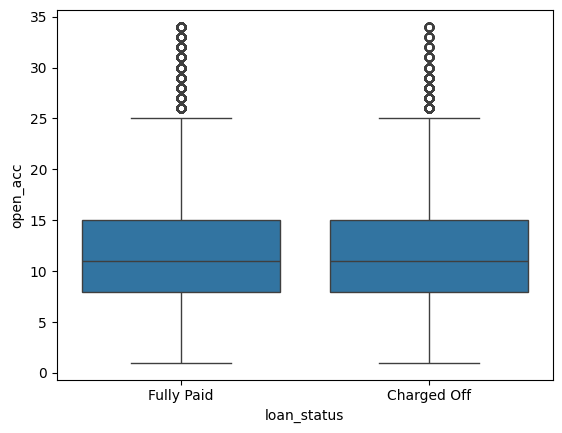

In [815]:
sns.boxplot(x='loan_status', y='open_acc', data=filtered_df)

<Axes: xlabel='open_acc', ylabel='count'>

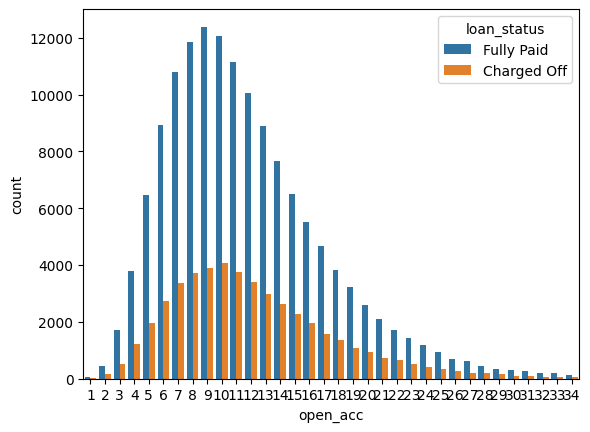

In [816]:
sns.countplot(data=filtered_df, x='open_acc', hue='loan_status')

In [817]:
grouped = filtered_df.groupby(['open_acc', 'loan_status']).size().unstack(fill_value=0)

# Calculate ratio for each loan status within each open_acc type
ratio_df = grouped.div(grouped.sum(axis=1), axis=0)

# Print the ratio dataframe
print("Ratio of loan status grouped by each open_acc type:")
print(ratio_df)

Ratio of loan status grouped by each open_acc type:
loan_status  Charged Off  Fully Paid
open_acc                            
1               0.269841    0.730159
2               0.270227    0.729773
3               0.233244    0.766756
4               0.243713    0.756287
5               0.234083    0.765917
6               0.234075    0.765925
7               0.237998    0.762002
8               0.239522    0.760478
9               0.240093    0.759907
10              0.251613    0.748387
11              0.251577    0.748423
12              0.253211    0.746789
13              0.250253    0.749747
14              0.255594    0.744406
15              0.260098    0.739902
16              0.261720    0.738280
17              0.253844    0.746156
18              0.262601    0.737399
19              0.249186    0.750814
20              0.267877    0.732123
21              0.260501    0.739499
22              0.275964    0.724036
23              0.266462    0.733538
24              0.25837

##### pub_rec

<Axes: xlabel='pub_rec', ylabel='count'>

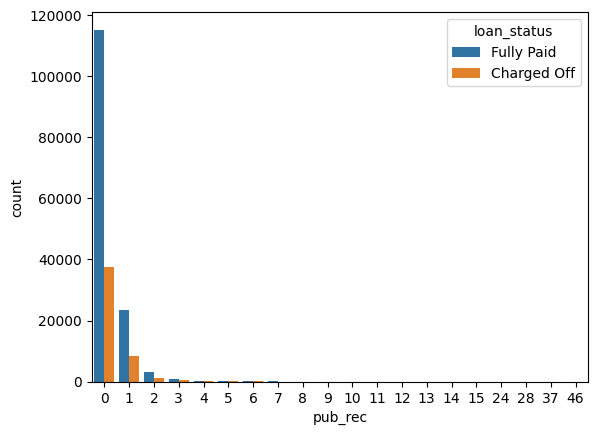

In [818]:
sns.countplot(data=df_modified, x='pub_rec', hue='loan_status')

Shape of the DataFrame where pub_rec is less than 8: (191438, 24)


<Axes: xlabel='pub_rec', ylabel='Count'>

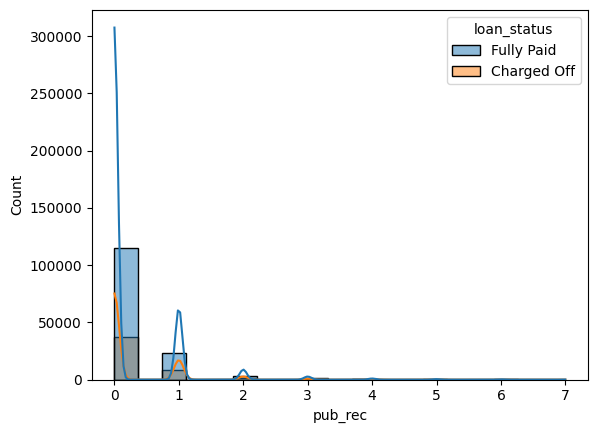

In [819]:
threshold = 8
filtered_df = df_modified[df_modified['pub_rec'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where pub_rec is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='pub_rec', kde=True, hue='loan_status')

In [820]:
grouped = filtered_df.groupby(['pub_rec', 'loan_status']).size().unstack(fill_value=0)

# Calculate ratio for each loan status within each pub_rec type
ratio_df = grouped.div(grouped.sum(axis=1), axis=0)

# Print the ratio dataframe
print("Ratio of loan status grouped by each pub_rec type:")
print(ratio_df)

Ratio of loan status grouped by each pub_rec type:
loan_status  Charged Off  Fully Paid
pub_rec                             
0               0.244824    0.755176
1               0.264786    0.735214
2               0.283648    0.716352
3               0.263429    0.736571
4               0.297959    0.702041
5               0.307692    0.692308
6               0.298246    0.701754
7               0.260870    0.739130


##### total_acc	

<Axes: xlabel='total_acc', ylabel='Count'>

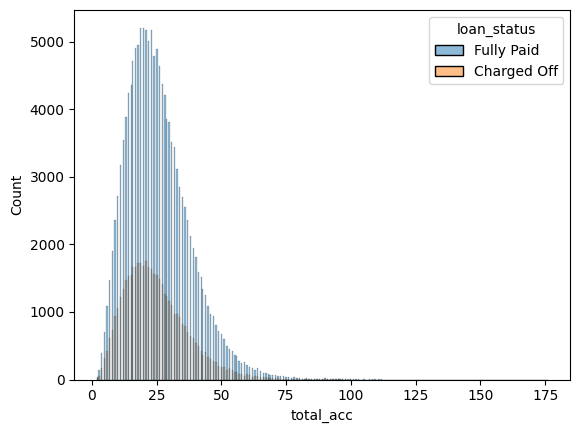

In [821]:
sns.histplot(data=df_modified, x='total_acc', hue='loan_status')

Shape of the DataFrame where totoal_acc is less than 75: (190988, 24)


<Axes: xlabel='total_acc', ylabel='Count'>

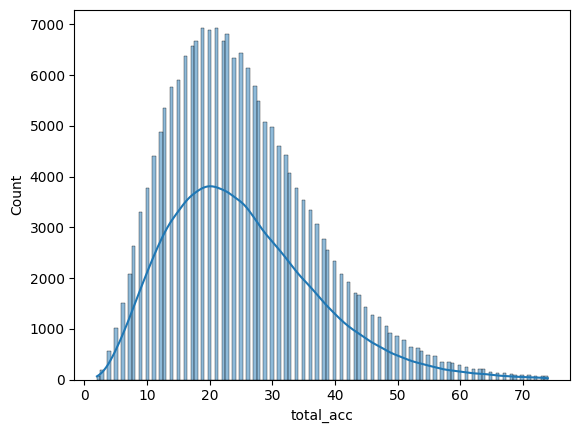

In [822]:
threshold = 75
filtered_df = df_modified[df_modified['total_acc'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where totoal_acc is less than {threshold}:", filtered_df.shape)

sns.histplot(filtered_df['total_acc'], kde = True)

<Axes: xlabel='loan_status', ylabel='total_acc'>

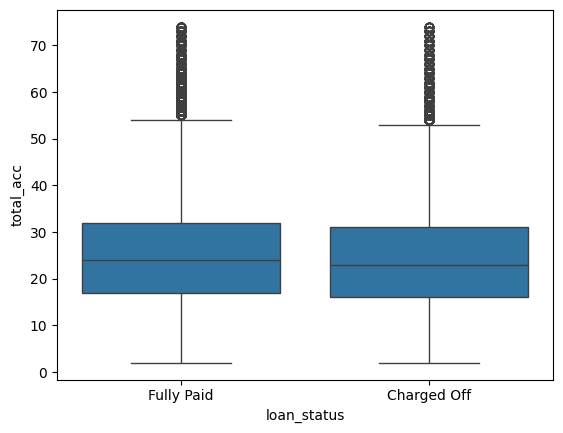

In [823]:
sns.boxplot(x='loan_status', y='total_acc', data=filtered_df)

##### total_pymnt

<Axes: xlabel='total_pymnt', ylabel='Count'>

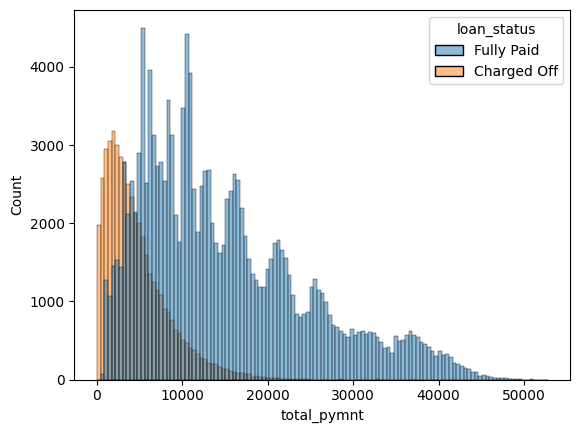

In [824]:
sns.histplot(data=df_modified, x='total_pymnt', hue='loan_status')

<Axes: xlabel='loan_status', ylabel='total_pymnt'>

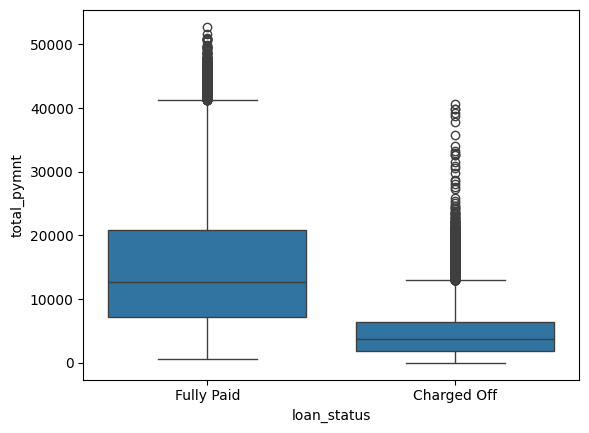

In [825]:
sns.boxplot(x='loan_status', y='total_pymnt', data=filtered_df)

##### total_rec_int

Shape of the DataFrame where total_rec_int is less than 6000: (188051, 24)


<Axes: xlabel='total_rec_int', ylabel='Count'>

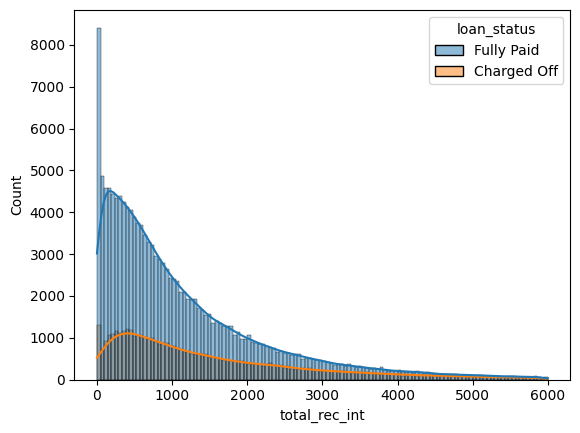

In [826]:
threshold = 6000
filtered_df = df_modified[df_modified['total_rec_int'] < threshold]

# Check the shape of the filtered DataFrame
print(f"Shape of the DataFrame where total_rec_int is less than {threshold}:", filtered_df.shape)

sns.histplot(data=filtered_df, x='total_rec_int', kde=True, hue='loan_status')

<Axes: xlabel='loan_status', ylabel='total_rec_int'>

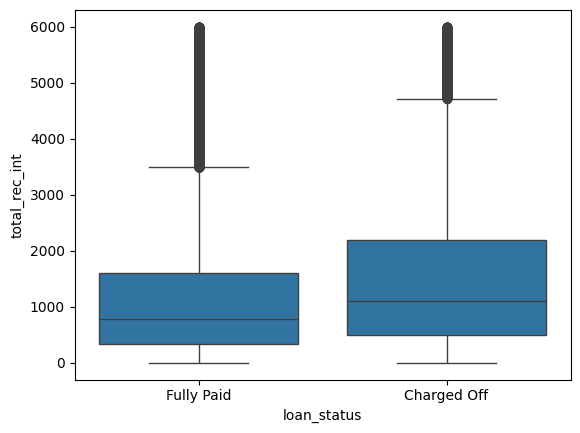

In [827]:
sns.boxplot(x='loan_status', y='total_rec_int', data=filtered_df)

##### total_rec_late_fee

In [828]:
df_modified['total_rec_late_fee'].value_counts()

total_rec_late_fee
0.000000      184137
15.000000       1730
30.000000        305
45.000000         95
10.000000         28
               ...  
29.980000          1
30.340000          1
107.800000         1
50.260001          1
60.480000          1
Name: count, Length: 2973, dtype: int64

<Axes: xlabel='total_rec_late_fee', ylabel='count'>

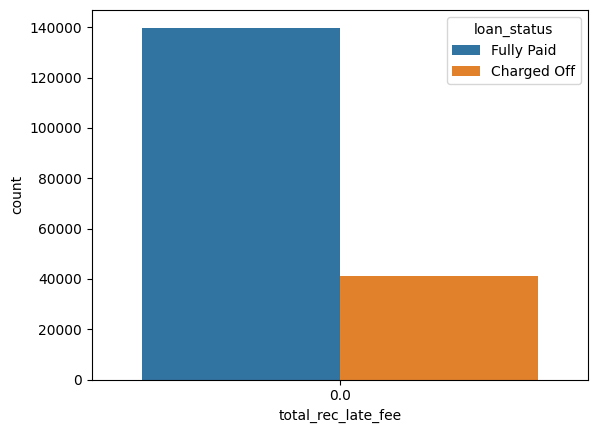

In [829]:
filtered_df_non_zero = filtered_df[filtered_df['total_rec_late_fee'] == 0]

sns.countplot(data=filtered_df_non_zero, x='total_rec_late_fee', hue='loan_status')

<Axes: xlabel='total_rec_late_fee', ylabel='count'>

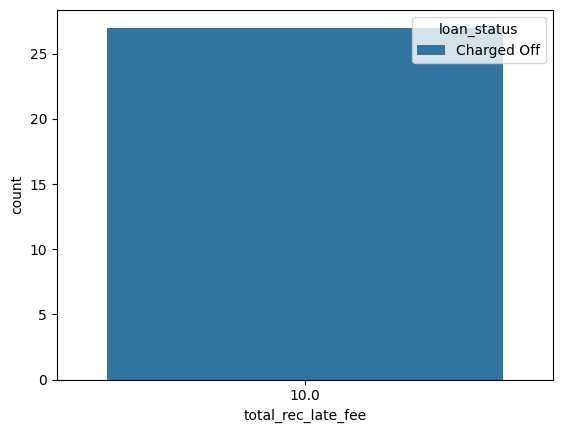

In [830]:
filtered_df_non_zero = filtered_df[filtered_df['total_rec_late_fee'] == 10]

sns.countplot(data=filtered_df_non_zero, x='total_rec_late_fee', hue='loan_status')

<Axes: xlabel='total_rec_late_fee', ylabel='count'>

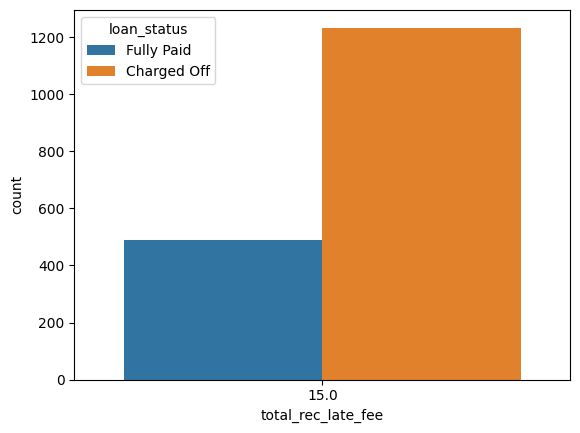

In [831]:
filtered_df_non_zero = filtered_df[filtered_df['total_rec_late_fee'] == 15]

sns.countplot(data=filtered_df_non_zero, x='total_rec_late_fee', hue='loan_status')

<Axes: xlabel='total_rec_late_fee', ylabel='count'>

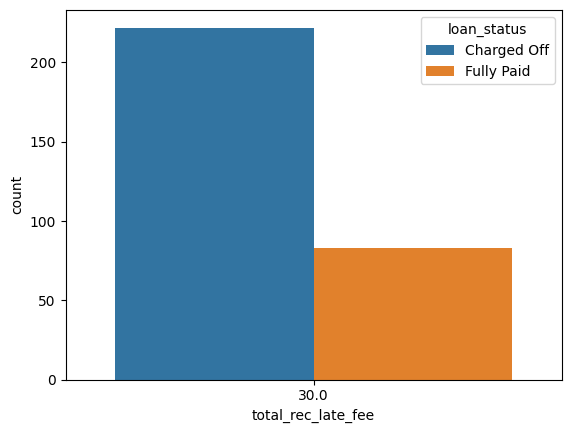

In [832]:
filtered_df_non_zero = filtered_df[filtered_df['total_rec_late_fee'] == 30]

sns.countplot(data=filtered_df_non_zero, x='total_rec_late_fee', hue='loan_status')

In [833]:
df_modified = df_modified.drop(columns=['total_rec_late_fee'])

##### collections_12_mths_ex_med

In [834]:
df_modified.groupby('loan_status')['collections_12_mths_ex_med'].value_counts()

loan_status  collections_12_mths_ex_med
Charged Off  0                              46599
             1                               1094
             2                                 76
             3                                  6
             4                                  3
             6                                  2
             5                                  1
Fully Paid   0                             141195
             1                               2374
             2                                138
             3                                 12
             4                                  6
             5                                  3
             6                                  3
             12                                 2
             7                                  1
Name: count, dtype: int64

#### Categorical variables

In [835]:
print(df_modified.describe(include='object'))
df_modified.head()

       emp_length home_ownership             purpose   grade sub_grade  \
count      179277         191515              191515  191515    191515   
unique         11              5                  12       7        35   
top     10+ years       MORTGAGE  debt_consolidation       C        C1   
freq        65182          95330              109785   56959     12914   

       verification_status addr_state       term loan_status  
count               191515     191515     191515      191515  
unique                   3         50          2           2  
top        Source Verified         CA  36 months  Fully Paid  
freq                 77231      28017     146106      143734  


annual_inc    dti  revol_util emp_length home_ownership  \
8     153000.0  16.99        22.7    6 years            OWN   
10     50000.0   6.07        98.9    2 years           RENT   
24    110000.0  13.12        27.2    7 years       MORTGAGE   
42     51979.0  10.11        20.0    7 years           RENT   
91     75000.0  10.86        90.0    7 years       MORTGAGE   

               purpose  loan_amnt  int_rate grade sub_grade  \
8          credit_card      11575      7.35     A        A4   
10  debt_consolidation       7200     24.85     E        E3   
24  debt_consolidation       7500      7.35     A        A4   
42  debt_consolidation      10000     16.02     C        C5   
91  debt_consolidation      14000     16.02     C        C5   

   verification_status  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
8         Not Verified            0             0.0        20        1   
10     Source Verified            0             0.0         4        0   
24        Not Verified            0             2.0        19        0   
42     Source Verified            0             0.0        15        2   
91            Verified            1             0.0         4        0   

    total_acc addr_state       term   total_pymnt  total_rec_int  \
8          46         CA  36 months  11707.816236         132.82   
10          5         WA  36 months   7206.461000           6.46   
24         27         TX  36 months   7642.289180         142.29   
42         21         CA  60 months  10026.700000          26.70   
91         10         MA  36 months  14375.136851         375.14   

    collections_12_mths_ex_med loan_status  principal_collected_percentage  
8                            0  Fully Paid                           100.0  
10                           0  Fully Paid                           100.0  
24                           0  Fully Paid                           100.0  
42                           0  Fully Paid                           100.0  
91                           0  Fully Paid                           100.0

##### Grade and SubGrade

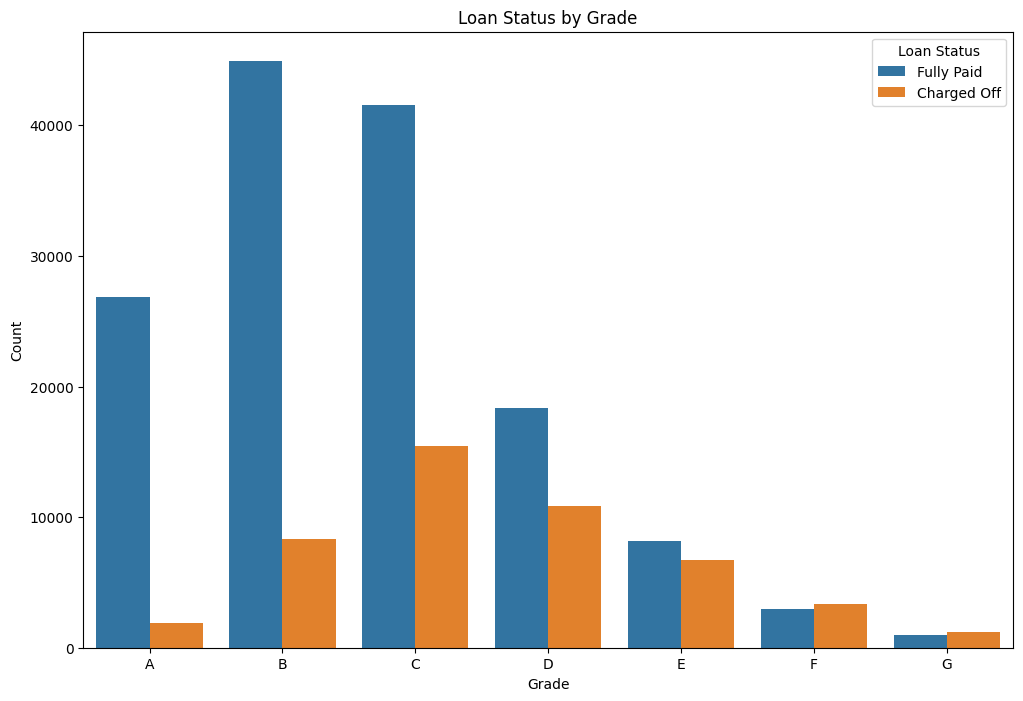

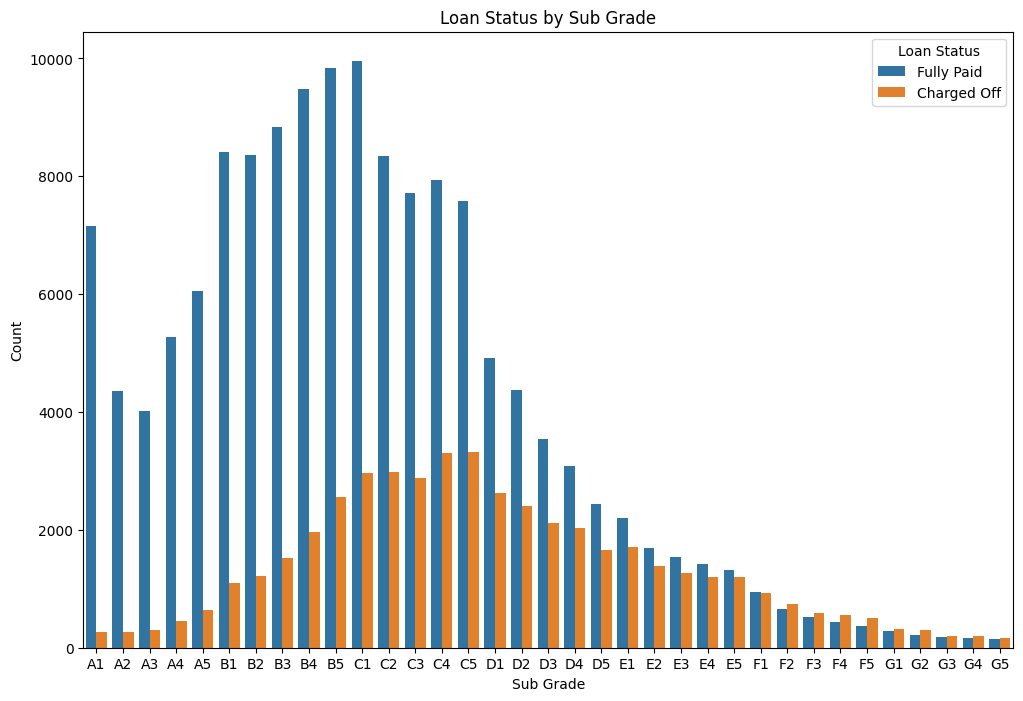

In [836]:
plt.figure(figsize=(12,8))
sns.countplot(x='grade', hue='loan_status', data=df_modified, order=sorted(df_modified['grade'].unique()))
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(x='sub_grade', hue='loan_status', data=df_modified, order=sorted(df_modified['sub_grade'].unique()))
plt.title('Loan Status by Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [837]:
df_modified = df_modified.drop(columns=['grade']);

##### Home Ownership

In [838]:
df_modified['home_ownership'].value_counts()

home_ownership
MORTGAGE    95330
RENT        72242
OWN         23837
ANY           105
NONE            1
Name: count, dtype: int64

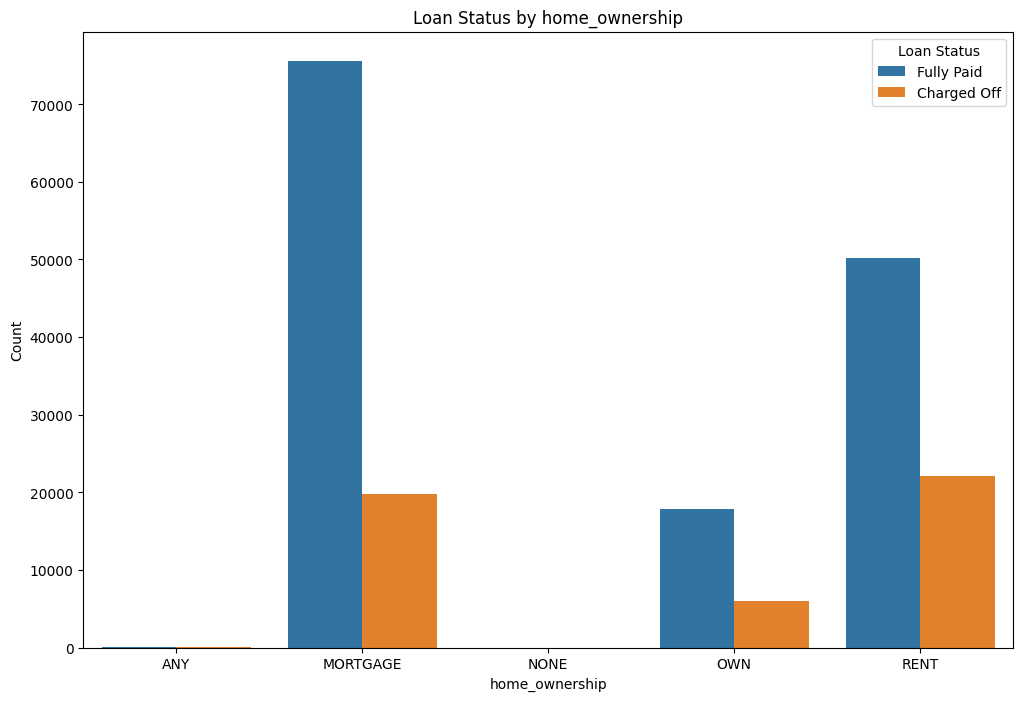

In [839]:
plt.figure(figsize=(12,8))
sns.countplot(x='home_ownership', hue='loan_status', data=df_modified, order=sorted(df_modified['home_ownership'].unique()))
plt.title('Loan Status by home_ownership')
plt.xlabel('home_ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

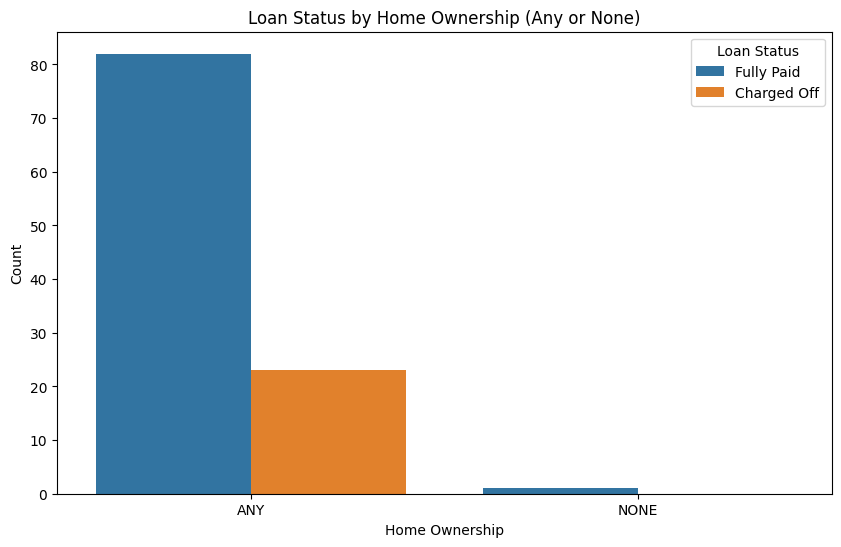

In [840]:
# Filter the DataFrame for rows where home_ownership is 'any' or 'none'
filtered_df = df_modified[df_modified['home_ownership'].isin(['ANY', 'NONE'])]

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=filtered_df)
plt.title('Loan Status by Home Ownership (Any or None)')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [841]:
df_modified.loc[df_modified['home_ownership'] == 'NONE', 'home_ownership'] = 'ANY'
df_modified['home_ownership'].value_counts()

home_ownership
MORTGAGE    95330
RENT        72242
OWN         23837
ANY           106
Name: count, dtype: int64

##### Purpose

In [842]:
df_modified['purpose'].value_counts()

purpose
debt_consolidation    109785
credit_card            37169
home_improvement       14683
other                  13199
major_purchase          5009
medical                 2628
car                     2255
small_business          2126
moving                  1697
vacation                1612
house                   1200
renewable_energy         152
Name: count, dtype: int64

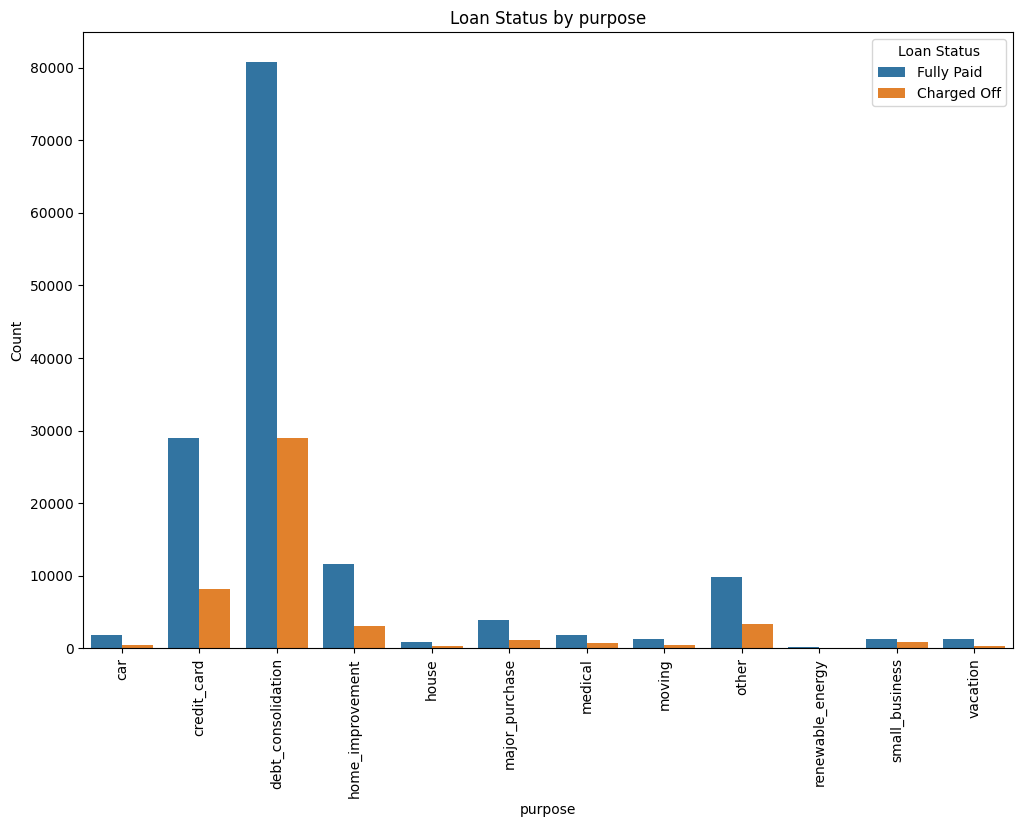

In [843]:
plt.figure(figsize=(12,8))
sns.countplot(x='purpose', hue='loan_status', data=df_modified, order=sorted(df_modified['purpose'].unique()))
plt.title('Loan Status by purpose')
plt.xlabel('purpose')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

##### Verification Status

In [844]:
df_modified['verification_status'].value_counts()

verification_status
Source Verified    77231
Not Verified       57301
Verified           56983
Name: count, dtype: int64

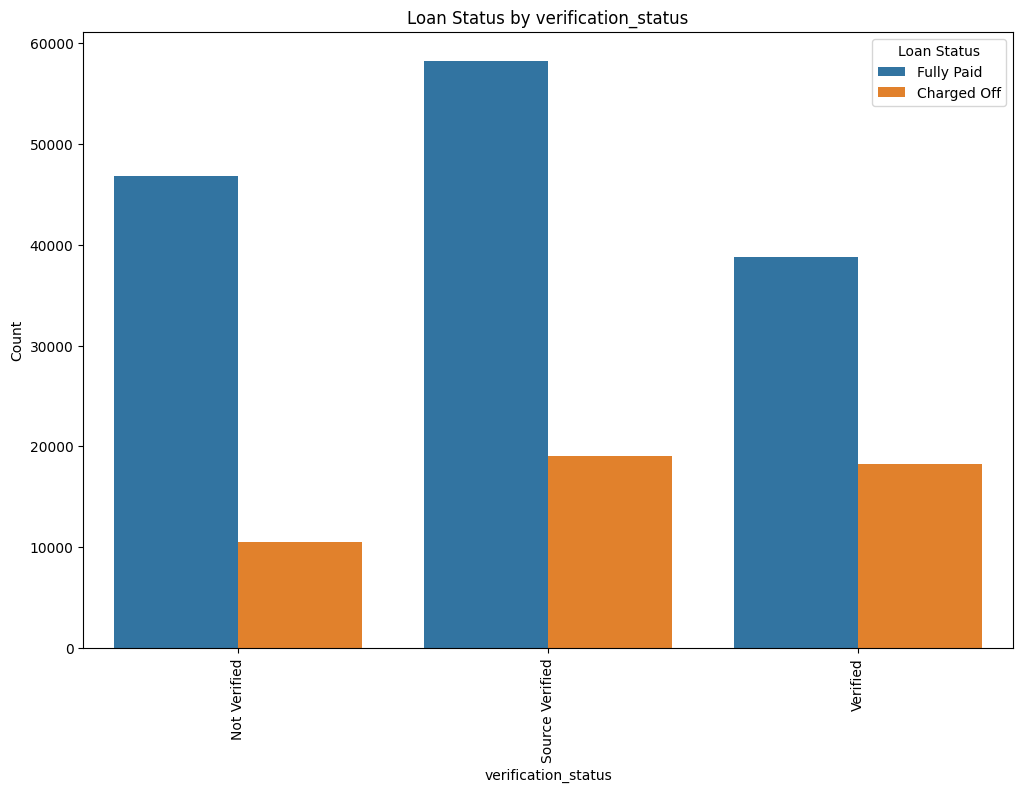

In [845]:
plt.figure(figsize=(12,8))
sns.countplot(x='verification_status', hue='loan_status', data=df_modified, order=sorted(df_modified['verification_status'].unique()))
plt.title('Loan Status by verification_status')
plt.xlabel('verification_status')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

##### Employment Length

emp_length
10+ years    65182
2 years      17570
3 years      15483
< 1 year     14739
1 year       13072
5 years      11808
4 years      11301
6 years       8160
8 years       7971
9 years       7602
7 years       6389
Name: count, dtype: int64
--------------------------------

loan_status
Fully Paid     8194
Charged Off    4044
Name: count, dtype: int64


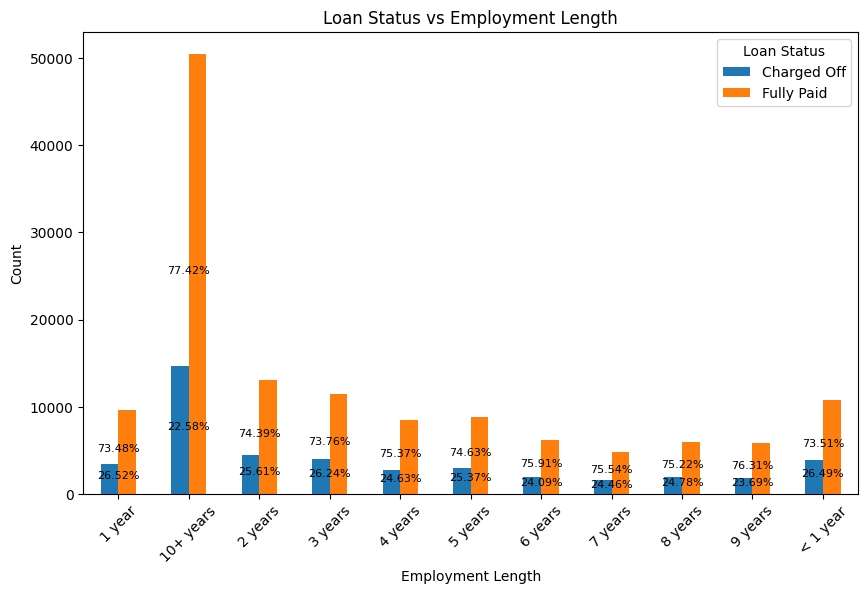

In [846]:
print(df_modified['emp_length'].value_counts())
print('--------------------------------\n')

null_emp_length_df = df_modified[df_modified['emp_length'].isnull()]
print(null_emp_length_df['loan_status'].value_counts())

grouped = df_modified.groupby(['emp_length', 'loan_status']).size().unstack();
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Loan Status vs Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')


for col in grouped.columns:
    for i, val in enumerate(grouped.index):
        total_counts = grouped.loc[val].sum()
        if total_counts != 0:
            percentage = (grouped.loc[val, col] / total_counts * 100).round(2)
            plt.text(i, grouped.loc[val, col] / 2, str(percentage) + '%', ha='center', color='black', fontsize=8)

plt.show()

In [847]:
df_modified = df_modified.drop(columns='emp_length');

##### Address State

In [848]:
df_modified['addr_state'].unique()


array(['CA', 'WA', 'TX', 'MA', 'NJ', 'FL', 'NY', 'CT', 'MT', 'MN', 'WI',
       'AR', 'MI', 'VA', 'GA', 'DC', 'MD', 'MS', 'PA', 'MO', 'SC', 'NV',
       'OH', 'CO', 'LA', 'HI', 'NM', 'IN', 'AZ', 'TN', 'IL', 'KY', 'OR',
       'ME', 'NC', 'OK', 'ND', 'RI', 'ID', 'AL', 'SD', 'UT', 'NH', 'KS',
       'NE', 'VT', 'DE', 'AK', 'WY', 'WV'], dtype=object)

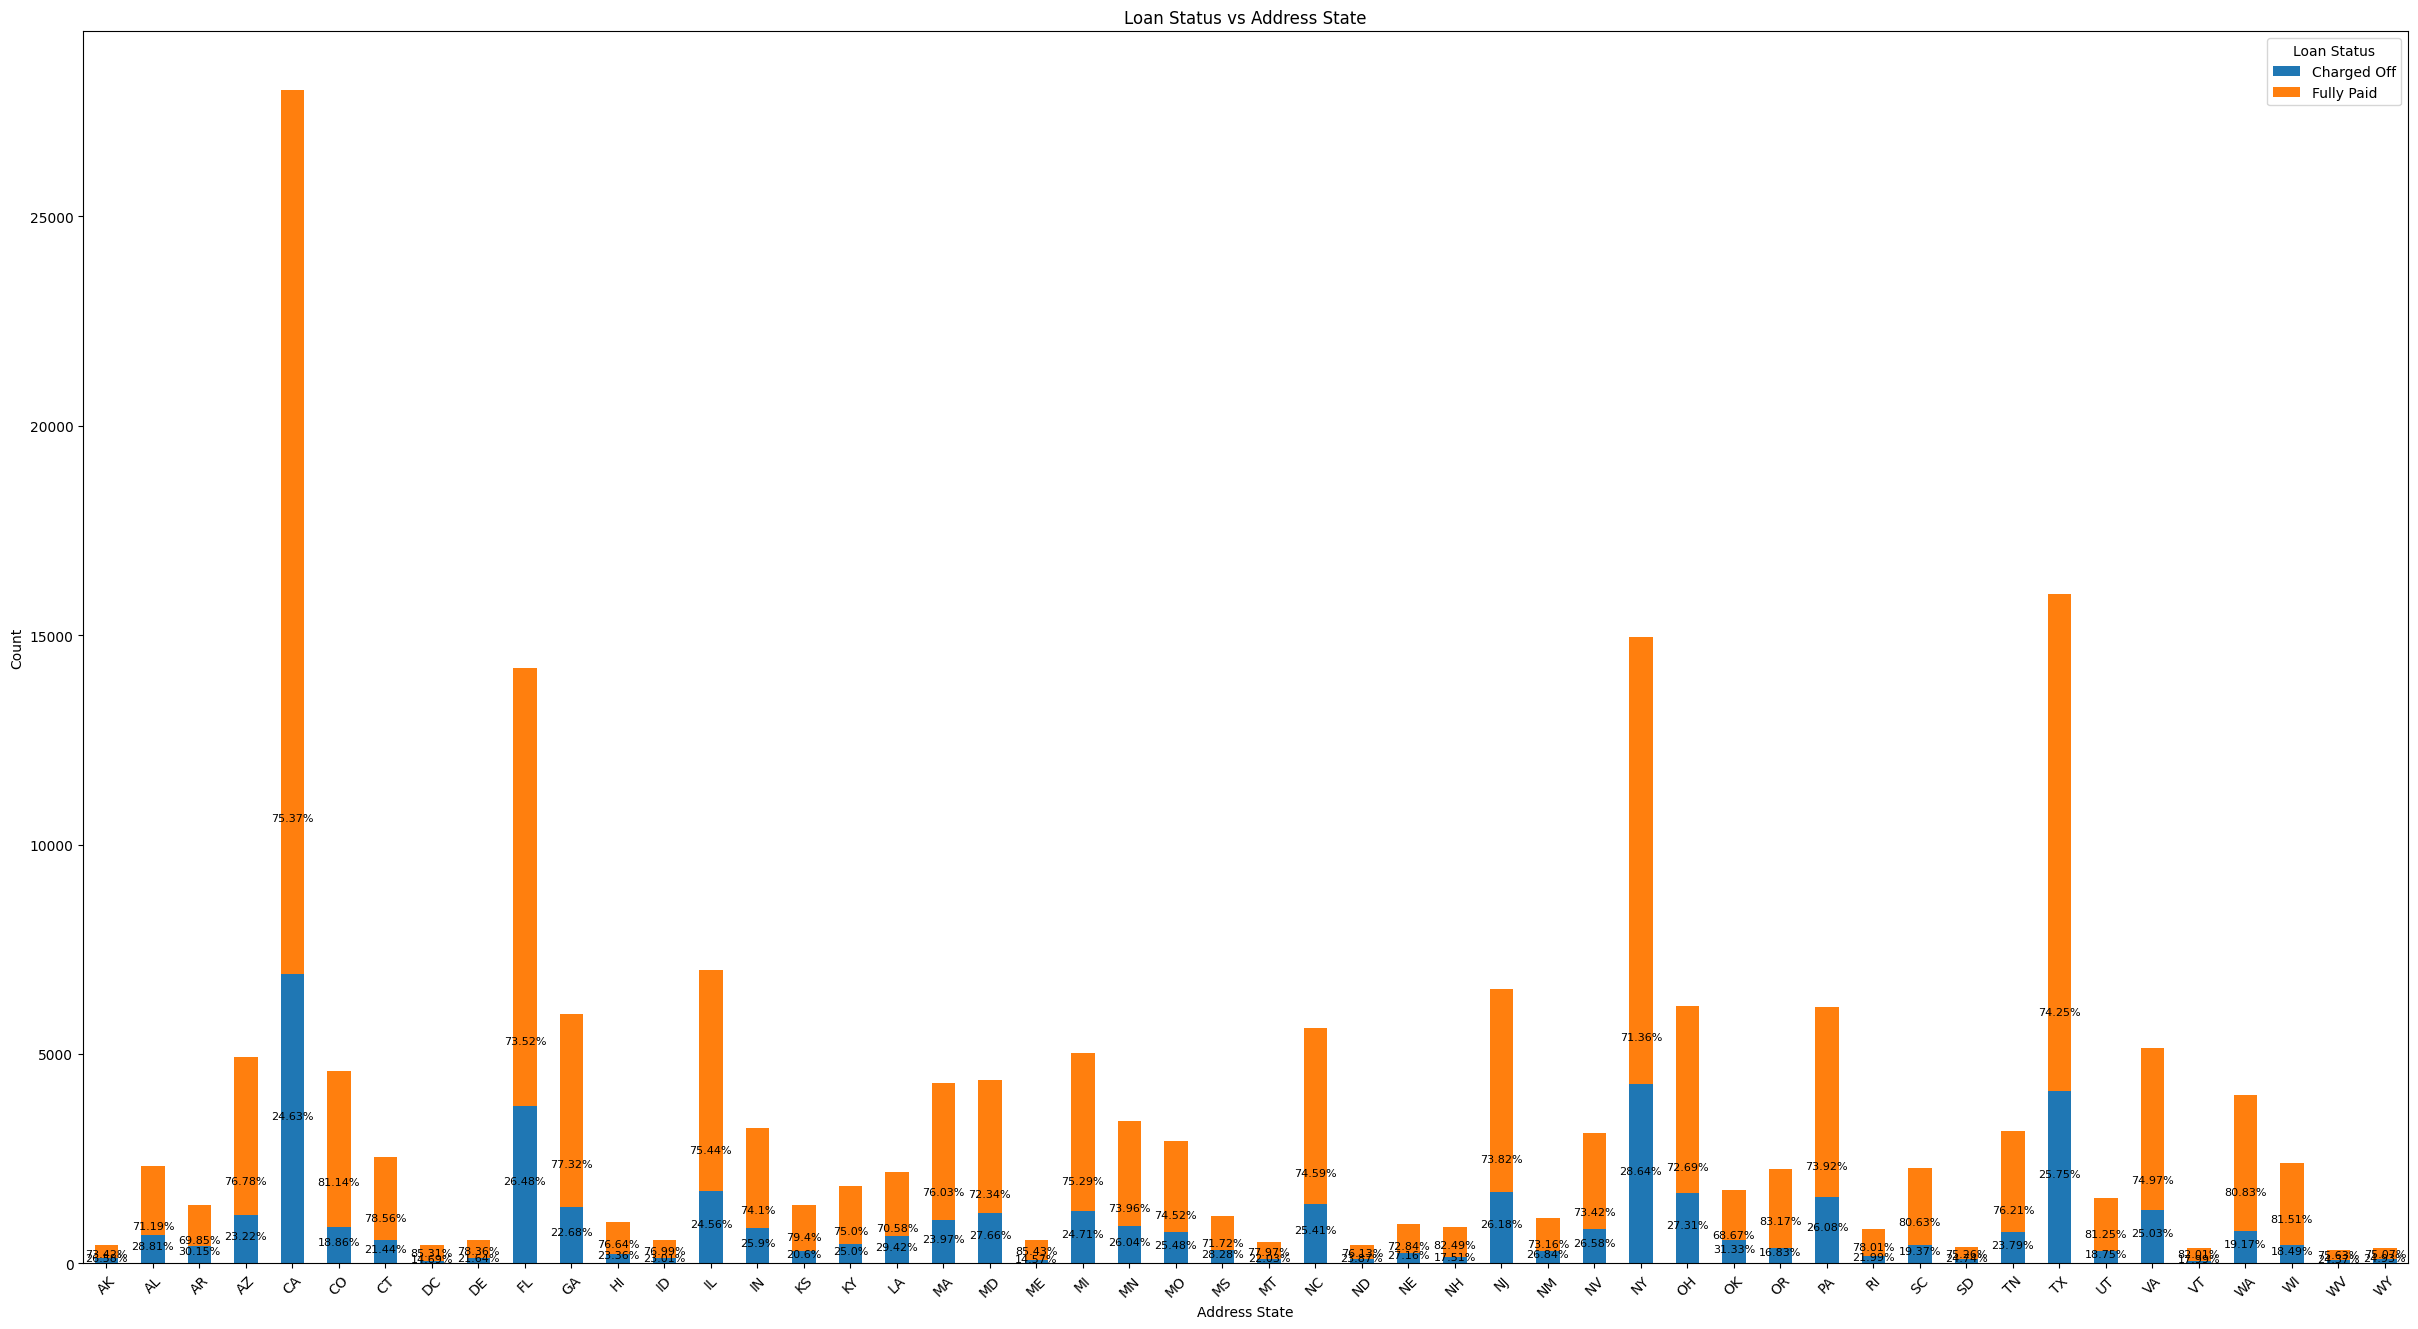

In [849]:
# Group by addr_state and loan_status
grouped_state = df_modified.groupby(['addr_state', 'loan_status']).size().unstack()

# Plot
plt.figure(figsize=(30, 16))
grouped_state.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Loan Status vs Address State')
plt.xlabel('Address State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')

# Calculate and display the percentage of loan status in every address state
for col in grouped_state.columns:
    for i, val in enumerate(grouped_state.index):
        total_counts = grouped_state.loc[val].sum()
        if total_counts != 0:
            percentage = (grouped_state.loc[val, col] / total_counts * 100).round(2)
            plt.text(i, grouped_state.loc[val, col] / 2, str(percentage) + '%', ha='center', color='black', fontsize=8)

plt.show()

##### Term

In [850]:
df_modified['term'].value_counts()

term
36 months    146106
60 months     45409
Name: count, dtype: int64

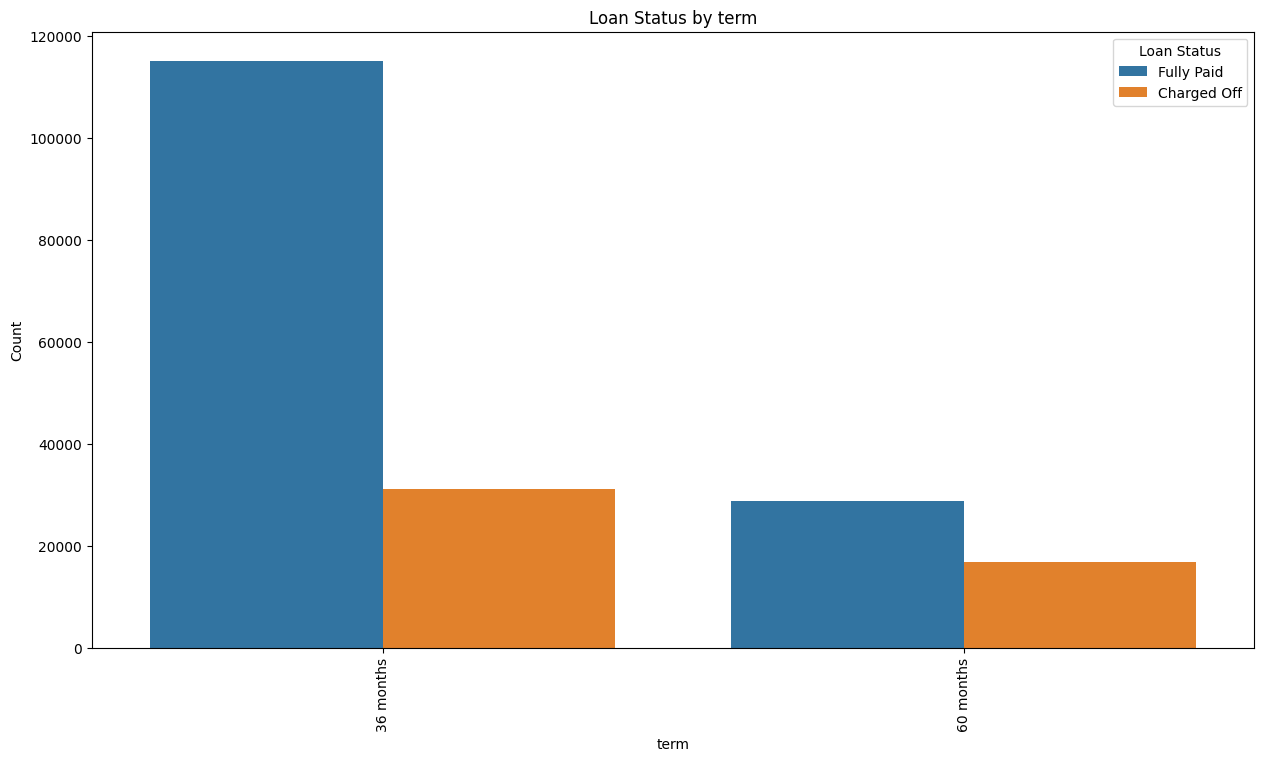

In [851]:
plt.figure(figsize=(15,8))
sns.countplot(x='term', hue='loan_status', data=df_modified, order=sorted(df_modified['term'].unique()))
plt.title('Loan Status by term')
plt.xlabel('term')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

#### Encoding Categorical variables

In [852]:
df_modified.describe(include='object')

home_ownership             purpose sub_grade verification_status  \
count          191515              191515    191515              191515   
unique              4                  12        35                   3   
top          MORTGAGE  debt_consolidation        C1     Source Verified   
freq            95330              109785     12914               77231   

       addr_state       term loan_status  
count      191515     191515      191515  
unique         50          2           2  
top            CA  36 months  Fully Paid  
freq        28017     146106      143734

##### Ranking Categorical variables

###### sub_grade

In [853]:
sub_grades = df_modified['sub_grade'].unique();
print(sub_grades)

encoder = OrdinalEncoder(categories=[sub_grades])

encoded_sub_grades = encoder.fit_transform(df_modified[['sub_grade']])
print(encoded_sub_grades)

df_modified['encoded_sub_grade'] = encoded_sub_grades
print(df_modified.shape)
df_modified.describe(include='all')

['A4' 'E3' 'C5' 'G1' 'B5' 'D2' 'B4' 'B3' 'B1' 'C4' 'D5' 'B2' 'C2' 'D4'
 'E2' 'A1' 'E1' 'E4' 'C3' 'E5' 'D1' 'G3' 'A3' 'C1' 'A5' 'D3' 'F3' 'F5'
 'A2' 'G2' 'F2' 'G4' 'F4' 'G5' 'F1']
[[ 0.]
 [ 1.]
 [ 0.]
 ...
 [11.]
 [24.]
 [11.]]
(191515, 22)


annual_inc            dti     revol_util home_ownership  \
count   1.915150e+05  191515.000000  191515.000000         191515   
unique           NaN            NaN            NaN              4   
top              NaN            NaN            NaN       MORTGAGE   
freq             NaN            NaN            NaN          95330   
mean    7.984813e+04      18.566909      47.740032            NaN   
std     7.632500e+04      11.187706      24.726543            NaN   
min     0.000000e+00      -1.000000       0.000000            NaN   
25%     4.900000e+04      11.900000      28.800000            NaN   
50%     6.800000e+04      17.900000      47.000000            NaN   
75%     9.500000e+04      24.600000      66.300000            NaN   
max     9.550000e+06     999.000000     172.000000            NaN   

                   purpose      loan_amnt       int_rate sub_grade  \
count               191515  191515.000000  191515.000000    191515   
unique                  12            NaN            NaN        35   
top     debt_consolidation            NaN            NaN        C1   
freq                109785            NaN            NaN     12914   
mean                   NaN   14604.011174      13.787241       NaN   
std                    NaN    9114.805202       5.470286       NaN   
min                    NaN    1000.000000       5.320000       NaN   
25%                    NaN    7500.000000       9.750000       NaN   
50%                    NaN   12000.000000      12.880000       NaN   
75%                    NaN   20000.000000      16.990000       NaN   
max                    NaN   40000.000000      30.990000       NaN   

       verification_status   delinq_2yrs  inq_last_6mths       open_acc  \
count               191515  191515.00000   191515.000000  191515.000000   
unique                   3           NaN             NaN            NaN   
top        Source Verified           NaN             NaN            NaN   
freq                 77231           NaN             NaN            NaN   
mean                   NaN       0.34201        0.635569      11.931541   
std                    NaN       0.92968        0.918925       5.749732   
min                    NaN       0.00000        0.000000       1.000000   
25%                    NaN       0.00000        0.000000       8.000000   
50%                    NaN       0.00000        0.000000      11.000000   
75%                    NaN       0.00000        1.000000      15.000000   
max                    NaN      21.00000        5.000000      86.000000   

              pub_rec      total_acc addr_state       term    total_pymnt  \
count   191515.000000  191515.000000     191515     191515  191515.000000   
unique            NaN            NaN         50          2            NaN   
top               NaN            NaN         CA  36 months            NaN   
freq              NaN            NaN      28017     146106            NaN   
mean         0.261656      25.423622        NaN        NaN   12434.565498   
std          0.653623      12.319893        NaN        NaN    9837.982116   
min          0.000000       2.000000        NaN        NaN       0.000000   
25%          0.000000      17.000000        NaN        NaN    4961.010000   
50%          0.000000      24.000000        NaN        NaN    9935.580000   
75%          0.000000      32.000000        NaN        NaN   17380.961238   
max         46.000000     176.000000        NaN        NaN   52779.784886   

        total_rec_int  collections_12_mths_ex_med loan_status  \
count   191515.000000               191515.000000      191515   
unique            NaN                         NaN           2   
top               NaN                         NaN  Fully Paid   
freq              NaN                         NaN      143734   
mean      1351.423787                    0.021236         NaN   
std       1460.226132                    0.164154         NaN   
min          0.000000                    0.000000         N

##### Nominal categorical variables


###### home_ownership

In [854]:
ownership_types = df_modified['home_ownership'].unique()
print(ownership_types)
print('----------------\n')
print(df_modified['home_ownership'].value_counts())

one_hot_df = pd.get_dummies(df_modified['home_ownership'], prefix='home_ownership')

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df_encoded_home_ownership = pd.concat([df_modified, one_hot_df], axis=1)

print(df_encoded_home_ownership.shape)
print(df_encoded_home_ownership.describe(include='all'))


['OWN' 'RENT' 'MORTGAGE' 'ANY']
----------------

home_ownership
MORTGAGE    95330
RENT        72242
OWN         23837
ANY           106
Name: count, dtype: int64
(191515, 26)
          annual_inc            dti     revol_util home_ownership  \
count   1.915150e+05  191515.000000  191515.000000         191515   
unique           NaN            NaN            NaN              4   
top              NaN            NaN            NaN       MORTGAGE   
freq             NaN            NaN            NaN          95330   
mean    7.984813e+04      18.566909      47.740032            NaN   
std     7.632500e+04      11.187706      24.726543            NaN   
min     0.000000e+00      -1.000000       0.000000            NaN   
25%     4.900000e+04      11.900000      28.800000            NaN   
50%     6.800000e+04      17.900000      47.000000            NaN   
75%     9.500000e+04      24.600000      66.300000            NaN   
max     9.550000e+06     999.000000     172.000000            NaN

###### Purpose

In [855]:
purposes = df_modified['purpose'].unique()
print(purposes)
print('----------------\n')
print(df_modified['purpose'].value_counts())

one_hot_df = pd.get_dummies(df_encoded_home_ownership['purpose'], prefix='purpose')

df_encoded_purpose = pd.concat([df_encoded_home_ownership, one_hot_df], axis=1)

print(df_encoded_purpose.shape)
print(df_encoded_purpose.describe(include='all'))

['credit_card' 'debt_consolidation' 'home_improvement' 'other' 'medical'
 'major_purchase' 'moving' 'car' 'vacation' 'small_business' 'house'
 'renewable_energy']
----------------

purpose
debt_consolidation    109785
credit_card            37169
home_improvement       14683
other                  13199
major_purchase          5009
medical                 2628
car                     2255
small_business          2126
moving                  1697
vacation                1612
house                   1200
renewable_energy         152
Name: count, dtype: int64
(191515, 38)
          annual_inc            dti     revol_util home_ownership  \
count   1.915150e+05  191515.000000  191515.000000         191515   
unique           NaN            NaN            NaN              4   
top              NaN            NaN            NaN       MORTGAGE   
freq             NaN            NaN            NaN          95330   
mean    7.984813e+04      18.566909      47.740032            NaN   
std     7.

###### verification_status

In [856]:
verification_statuses = df_modified['verification_status'].unique()
print(verification_statuses)
print('----------------\n')
print(df_modified['verification_status'].value_counts())

one_hot_df = pd.get_dummies(df_encoded_purpose['verification_status'], prefix='verification_status')

df_encoded_verification_status = pd.concat([df_encoded_purpose, one_hot_df], axis=1)

print(df_encoded_verification_status.shape)
print(df_encoded_verification_status.describe(include='all'))

['Not Verified' 'Source Verified' 'Verified']
----------------

verification_status
Source Verified    77231
Not Verified       57301
Verified           56983
Name: count, dtype: int64
(191515, 41)
          annual_inc            dti     revol_util home_ownership  \
count   1.915150e+05  191515.000000  191515.000000         191515   
unique           NaN            NaN            NaN              4   
top              NaN            NaN            NaN       MORTGAGE   
freq             NaN            NaN            NaN          95330   
mean    7.984813e+04      18.566909      47.740032            NaN   
std     7.632500e+04      11.187706      24.726543            NaN   
min     0.000000e+00      -1.000000       0.000000            NaN   
25%     4.900000e+04      11.900000      28.800000            NaN   
50%     6.800000e+04      17.900000      47.000000            NaN   
75%     9.500000e+04      24.600000      66.300000            NaN   
max     9.550000e+06     999.000000     172

###### addr_state

In [857]:
df_modified.addr_state.value_counts().sort_values(ascending=False)

addr_state
CA    28017
TX    15974
NY    14948
FL    14226
IL     6998
NJ     6555
OH     6137
PA     6115
GA     5957
NC     5620
VA     5138
MI     5026
AZ     4932
CO     4582
MD     4371
MA     4317
WA     4027
MN     3399
IN     3236
TN     3152
NV     3123
MO     2924
CT     2551
WI     2401
AL     2336
SC     2271
OR     2252
LA     2189
KY     1844
OK     1746
UT     1563
AR     1403
KS     1403
MS     1135
NM     1073
HI      993
NE      950
NH      868
RI      814
ID      565
DE      550
ME      549
MT      513
ND      444
AK      444
DC      429
SD      384
VT      378
WY      377
WV      316
Name: count, dtype: int64

In [858]:
states_to_encode = [state for state in df_modified.addr_state.value_counts().sort_values(ascending=False).head(17).index]
print(states_to_encode)

for state in states_to_encode:
    df_modified[state] = np.where(df_modified['addr_state'] == state,  1, 0)

df_encoded_addr_state = pd.concat([df_encoded_verification_status, df_modified[states_to_encode]], axis=1)

print(df_encoded_addr_state.describe())
print(df_encoded_addr_state.shape)

['CA', 'TX', 'NY', 'FL', 'IL', 'NJ', 'OH', 'PA', 'GA', 'NC', 'VA', 'MI', 'AZ', 'CO', 'MD', 'MA', 'WA']
         annual_inc            dti     revol_util      loan_amnt  \
count  1.915150e+05  191515.000000  191515.000000  191515.000000   
mean   7.984813e+04      18.566909      47.740032   14604.011174   
std    7.632500e+04      11.187706      24.726543    9114.805202   
min    0.000000e+00      -1.000000       0.000000    1000.000000   
25%    4.900000e+04      11.900000      28.800000    7500.000000   
50%    6.800000e+04      17.900000      47.000000   12000.000000   
75%    9.500000e+04      24.600000      66.300000   20000.000000   
max    9.550000e+06     999.000000     172.000000   40000.000000   

            int_rate   delinq_2yrs  inq_last_6mths       open_acc  \
count  191515.000000  191515.00000   191515.000000  191515.000000   
mean       13.787241       0.34201        0.635569      11.931541   
std         5.470286       0.92968        0.918925       5.749732   
min     

###### term

In [859]:
term_types = df_modified['term'].unique()
print(term_types)
print('----------------\n')
print(df_modified['term'].value_counts())
 
label_encoder = LabelEncoder()
 
df_encoded_term = df_encoded_addr_state
df_encoded_term['term'] = label_encoder.fit_transform(df_encoded_addr_state['term'])
 
print(df_encoded_term.shape)
df_encoded_term.describe(include='all')

['36 months' '60 months']
----------------

term
36 months    146106
60 months     45409
Name: count, dtype: int64
(191515, 58)


annual_inc            dti     revol_util home_ownership  \
count   1.915150e+05  191515.000000  191515.000000         191515   
unique           NaN            NaN            NaN              4   
top              NaN            NaN            NaN       MORTGAGE   
freq             NaN            NaN            NaN          95330   
mean    7.984813e+04      18.566909      47.740032            NaN   
std     7.632500e+04      11.187706      24.726543            NaN   
min     0.000000e+00      -1.000000       0.000000            NaN   
25%     4.900000e+04      11.900000      28.800000            NaN   
50%     6.800000e+04      17.900000      47.000000            NaN   
75%     9.500000e+04      24.600000      66.300000            NaN   
max     9.550000e+06     999.000000     172.000000            NaN   

                   purpose      loan_amnt       int_rate sub_grade  \
count               191515  191515.000000  191515.000000    191515   
unique                  12            NaN            NaN        35   
top     debt_consolidation            NaN            NaN        C1   
freq                109785            NaN            NaN     12914   
mean                   NaN   14604.011174      13.787241       NaN   
std                    NaN    9114.805202       5.470286       NaN   
min                    NaN    1000.000000       5.320000       NaN   
25%                    NaN    7500.000000       9.750000       NaN   
50%                    NaN   12000.000000      12.880000       NaN   
75%                    NaN   20000.000000      16.990000       NaN   
max                    NaN   40000.000000      30.990000       NaN   

       verification_status   delinq_2yrs  inq_last_6mths       open_acc  \
count               191515  191515.00000   191515.000000  191515.000000   
unique                   3           NaN             NaN            NaN   
top        Source Verified           NaN             NaN            NaN   
freq                 77231           NaN             NaN            NaN   
mean                   NaN       0.34201        0.635569      11.931541   
std                    NaN       0.92968        0.918925       5.749732   
min                    NaN       0.00000        0.000000       1.000000   
25%                    NaN       0.00000        0.000000       8.000000   
50%                    NaN       0.00000        0.000000      11.000000   
75%                    NaN       0.00000        1.000000      15.000000   
max                    NaN      21.00000        5.000000      86.000000   

              pub_rec      total_acc addr_state           term    total_pymnt  \
count   191515.000000  191515.000000     191515  191515.000000  191515.000000   
unique            NaN            NaN         50            NaN            NaN   
top               NaN            NaN         CA            NaN            NaN   
freq              NaN            NaN      28017            NaN            NaN   
mean         0.261656      25.423622        NaN       0.237104   12434.565498   
std          0.653623      12.319893        NaN       0.425308    9837.982116   
min          0.000000       2.000000        NaN       0.000000       0.000000   
25%          0.000000      17.000000        NaN       0.000000    4961.010000   
50%          0.000000      24.000000        NaN       0.000000    9935.580000   
75%          0.000000      32.000000        NaN       0.000000   17380.961238   
max         46.000000     176.000000        NaN       1.000000   52779.784886   

        total_rec_int  collections_12_mths_ex_med loan_status  \
count   191515.000000               191515.000000      191515   
unique            NaN                         NaN           2   
top               NaN                         NaN  Fully Paid   
freq              NaN                         NaN      143734   
mean      1351.423787                    0.021236         NaN   
std       1460.226132                    0.164154         NaN   
min        

##### Remove additional Columns

In [860]:
# Remove encoded columns
df_all_encoded = df_encoded_term.drop(columns=['home_ownership', 'purpose', 'verification_status',
                                                'addr_state', 'sub_grade'])

print(df_all_encoded.describe(include='all'))

          annual_inc            dti     revol_util      loan_amnt  \
count   1.915150e+05  191515.000000  191515.000000  191515.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean    7.984813e+04      18.566909      47.740032   14604.011174   
std     7.632500e+04      11.187706      24.726543    9114.805202   
min     0.000000e+00      -1.000000       0.000000    1000.000000   
25%     4.900000e+04      11.900000      28.800000    7500.000000   
50%     6.800000e+04      17.900000      47.000000   12000.000000   
75%     9.500000e+04      24.600000      66.300000   20000.000000   
max     9.550000e+06     999.000000     172.000000   40000.000000   

             int_rate   delinq_2yrs  inq_last_6mths       open_acc  \
count   191515.000000  191515.00000   191515.000000  191515.000000   
unique            NaN          

In [861]:
# Remove dummy variable trap
df_all_encoded = df_all_encoded.drop(columns=['verification_status_Verified', 'purpose_renewable_energy', 'home_ownership_ANY', 'principal_collected_percentage'])

In [862]:
print(df_all_encoded.describe())
print(df_all_encoded.shape)

df_all_encoded.head(20)

         annual_inc            dti     revol_util      loan_amnt  \
count  1.915150e+05  191515.000000  191515.000000  191515.000000   
mean   7.984813e+04      18.566909      47.740032   14604.011174   
std    7.632500e+04      11.187706      24.726543    9114.805202   
min    0.000000e+00      -1.000000       0.000000    1000.000000   
25%    4.900000e+04      11.900000      28.800000    7500.000000   
50%    6.800000e+04      17.900000      47.000000   12000.000000   
75%    9.500000e+04      24.600000      66.300000   20000.000000   
max    9.550000e+06     999.000000     172.000000   40000.000000   

            int_rate   delinq_2yrs  inq_last_6mths       open_acc  \
count  191515.000000  191515.00000   191515.000000  191515.000000   
mean       13.787241       0.34201        0.635569      11.931541   
std         5.470286       0.92968        0.918925       5.749732   
min         5.320000       0.00000        0.000000       1.000000   
25%         9.750000       0.00000        

annual_inc    dti  revol_util  loan_amnt  int_rate  delinq_2yrs  \
8      153000.0  16.99        22.7      11575      7.35            0   
10      50000.0   6.07        98.9       7200     24.85            0   
24     110000.0  13.12        27.2       7500      7.35            0   
42      51979.0  10.11        20.0      10000     16.02            0   
91      75000.0  10.86        90.0      14000     16.02            1   
92     160000.0   7.09        24.3      17700     30.79            0   
176     63000.0  16.59        56.5      15000     11.99            0   
181     85000.0  14.63       100.0      20000     18.06            1   
207     38000.0  18.60        23.6       5000     10.91            1   
217     35000.0   7.89        95.9       5000     10.42            0   
222    250000.0   4.76         0.0      40000      9.44            1   
231     97500.0  11.88        66.6       6400     11.99            0   
242     85000.0  22.93        55.0      20000     11.99            0   
243    450000.0  13.76        84.0      35000     15.05            0   
249     45000.0  23.12        66.2      10000     10.42            0   
266     60000.0  13.58        69.5       9600     11.99            0   
272     62000.0  10.46         5.5      15000     16.02            1   
286     60000.0   3.54         1.5       8000     16.02            0   
295     35000.0  21.30        31.4      13000     21.45            0   
302     85000.0  16.91        40.9       3800      9.93            0   

     inq_last_6mths  open_acc  pub_rec  total_acc  term   total_pymnt  \
8               0.0        20        1         46     0  11707.816236   
10              0.0         4        0          5     0   7206.461000   
24              2.0        19        0         27     0   7642.289180   
42              0.0        15        2         21     1  10026.700000   
91              0.0         4        0         10     0  14375.136851   
92              3.0        14        1         36     0  17775.694167   
176             0.0         9        0         17     0  15667.093641   
181             1.0         4        0         10     0   2844.470000   
207             2.0         9        0         16     0   5218.214630   
217             0.0         3        0          7     0    479.750000   
222             0.0        11        0         34     0  40013.640000   
231             0.0         9        1         15     0   4702.090000   
242             0.0        12        0         42     0  20526.820000   
243             2.0        14        0         48     1   2427.550000   
249             1.0        12        0         20     0  10428.696294   
266             0.0         8        0         24     0  10008.724734   
272             2.0        15        0         25     0  15541.441323   
286             0.0         5        0          6     0   8531.151932   
295             0.0        30        0         52     1  14198.118222   
302             1.0        13        0         41     0   3929.478609   

     total_rec_int  collections_12_mths_ex_med  loan_status  \
8           132.82                           0   Fully Paid   
10            6.46                           0   Fully Paid   
24          142.29                           0   Fully Paid   
42           26.70                           0   Fully Paid   
91          375.14                           0   Fully Paid   
92           75.69                           0   Fully Paid   
176         667.09                           0   Fully Paid   
181        1117.46                           0  Charged Off   
207         218.21                           0   Fully Paid   
217         119.90                           0  Charged Off   
222          13.64                           0   Fully Paid   
231         294.08                           0   Fully Paid   
242         526.82                           0   Fully Paid   
243        1228.81                           0  Charged Off   
249         4

In [863]:
print(df_all_encoded['loan_status'].value_counts())

loan_status
Fully Paid     143734
Charged Off     47781
Name: count, dtype: int64


#### Spliting Training and Testing data sets

In [864]:
df_all_encoded_no_duplicates = df_all_encoded.drop_duplicates()

train_data, test_data = train_test_split(df_all_encoded, test_size=0.5, random_state=42)

print(train_data.shape)
print(test_data.shape)

(95757, 49)
(95758, 49)


#### Treating Outliers

In [865]:
train_data = train_data[train_data['annual_inc'] <= 170000]
train_data = train_data[train_data['dti'] <= 42]
train_data = train_data[train_data['revol_util'] <= 110]
train_data = train_data[train_data['delinq_2yrs'] <= 5]
train_data = train_data[train_data['open_acc'] <= 25]
train_data = train_data[train_data['pub_rec'] <= 8]
train_data = train_data[train_data['total_acc'] <= 75]
train_data = train_data[train_data['collections_12_mths_ex_med'] <= 4]
print(train_data.shape)

(88036, 49)


#### Feature Scaling

In [866]:
continuous_features = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [867]:
continuous_features = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Scale only the identified continuous features
scaler = RobustScaler()
train_data_scaled = train_data.copy() 
test_data_scaled = test_data.copy()

train_data_scaled[continuous_features] = scaler.fit_transform(train_data[continuous_features])
test_data_scaled[continuous_features] = scaler.transform(test_data[continuous_features])

In [868]:
train_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data_scaled.columns)

In [869]:
train_scaled_df.hvplot.box(rot=90, width=1000, height= 500)    

:BoxWhisker   [Variable]   (value)

#### Build a Model and Test

In [871]:
class_weight = dict({'Fully Paid':1, 'Charged Off': 3})

logistic_model = LogisticRegression(class_weight=class_weight)
logistic_model.fit(train_X_scaled, train_y)

# Predicting on the test set
predictions = logistic_model.predict(test_X_scaled)

# Calculating accuracy
accuracy = accuracy_score(test_y, predictions)     
print("Accuracy:", accuracy)
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, predictions))

Accuracy: 0.9960943211011091
[[23780   187]
 [  187 71604]]
              precision    recall  f1-score   support

 Charged Off       0.99      0.99      0.99     23967
  Fully Paid       1.00      1.00      1.00     71791

    accuracy                           1.00     95758
   macro avg       0.99      0.99      0.99     95758
weighted avg       1.00      1.00      1.00     95758



In [872]:
class_weight = dict({'Fully Paid':1, 'Charged Off': 3})

classifier = RandomForestClassifier(class_weight=class_weight)
classifier.fit(train_X_scaled, train_y)

predictions = classifier.predict(test_X_scaled)

# Calculating accuracy
accuracy = accuracy_score(test_y, predictions)     
print("Accuracy:", accuracy)
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, predictions))

Accuracy: 0.9908519392635602
[[23114   853]
 [   23 71768]]
              precision    recall  f1-score   support

 Charged Off       1.00      0.96      0.98     23967
  Fully Paid       0.99      1.00      0.99     71791

    accuracy                           0.99     95758
   macro avg       0.99      0.98      0.99     95758
weighted avg       0.99      0.99      0.99     95758



In [873]:
# Applying Neural Network
neural_network_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Fit the model to the scaled training data
neural_network_model.fit(train_X_scaled, train_y)

# Predicting on the test set
predictions = neural_network_model.predict(test_X_scaled)

# Calculating accuracy
accuracy = accuracy_score(test_y, predictions)     
print("Accuracy:", accuracy)
print(confusion_matrix(test_y, predictions))
print(classification_report(test_y, predictions))

Accuracy: 0.9958854612669438
[[23754   213]
 [  181 71610]]
              precision    recall  f1-score   support

 Charged Off       0.99      0.99      0.99     23967
  Fully Paid       1.00      1.00      1.00     71791

    accuracy                           1.00     95758
   macro avg       0.99      0.99      0.99     95758
weighted avg       1.00      1.00      1.00     95758

